# Data preprocessing

- Written by Yeon Soo Choi, Technical Officer, Research Unit, World Customs Organization
- Updated on 2020.6.30

## Summary

Preprocessing import data includes the following steps;
- Generating new meaningful/indicative variables from combining existing variables 
    - Example 1) Unit price of products (= CIF value / Quantity) could be a risk indicator of under/over-valuation within homogeneous product groups.
    - Example 2) Combination of HScodes and origin countries could be a risk indicator of supply chains.
    - Example 3) Combination of importer-ids and Customs-offices (or officials) could be a risk indicator of bad practices/collusions. 
- **Risk profiling of categorical variables**
    - Risk profiling in Customs enforcement is, for a given trade entity, to calculate its historical records of non-compliance (eg. a number of historical frauds, a ratio of frauds to its total imports or whether it belongs to a blacklist).
    - From a perspective of risk management, such non-compliance records could be a good risk indicator of its future frauds.  
    - From a technical perspective of machine learning, risk profiling is a good tactic to include categorical variables in a model. As machine learning models accept only numbers, any categorical variables we want to keep in our model need to be transformed to numbers. 

Preprocessed data is also useful in making rules for your current rule-based targeting systems. 

## Outline

1. Set environment and load data
2. Preprocess data  
    2.1. Step-by-Step  
    2.2. One-shot approach with functions
3. Visualization

## 1. Set environment and load data

In [95]:
# Set environment
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', 100)

%matplotlib inline

plt.style.use('fivethirtyeight')

sns.set_theme(style="darkgrid")

In [8]:
os.getcwd()

'C:\\Users\\javia\\Dropbox\\Master\\DGA\\Modelo de Selectividad'

In [2]:
os.listdir()

['.git',
 '.idea',
 '.ipynb_checkpoints',
 '1_1_Synthetic_import_data-DGA_Testing.ipynb',
 '1_1_Synthetic_import_data.ipynb',
 '1_2_How_to_generate_synthetic_import_data_CTGAN-DGA_Testing.ipynb',
 '1_2_How_to_generate_synthetic_import_data_CTGAN.ipynb',
 '2_Data_preprocessing-DGA_Testing.ipynb',
 '2_Data_preprocessing-mgr3-1019.ipynb',
 '2_Data_preprocessing-mgr5-item-1819.ipynb',
 '2_Data_preprocessing.ipynb',
 '3_Decision_Tree_Model-DGA_Testing.ipynb',
 '3_Decision_Tree_Model.ipynb',
 '4_XGBoost.ipynb',
 '5_Comparative_analysis_of_multiple_models.ipynb',
 '6_XGBoost_LR.ipynb',
 '7_Deep_Learning_with_Entity_Embedding.ipynb',
 '8_Dual_Tasks.ipynb',
 '9_BACUDA_DATE_MODEL_Manual_synthetic_data.ipynb',
 'kdd2020-date-paper.pdf',
 'kdd2020-date-slides.pdf',
 'perf_DT.csv',
 'README.md',
 'synthetic_data2.csv']

In [9]:
os.chdir(r'./data/')

In [10]:
os.listdir()

['2010.csv',
 '2011.csv',
 '2012.csv',
 '2013.csv',
 '2014.csv',
 '2015.csv',
 '2016.csv',
 '2017.csv',
 '2018.csv',
 '2019.csv']

In [264]:
#df11 = pd.read_csv('2011.csv')
#del df11

In [262]:
#df11[(df11['CONTRIBUYENTE'] == '06141011780023') & (df11['DESTINACION_MERCANCIA'] == 'IM')]['PROVEEDOR'].value_counts()
#df11[(df11['CONTRIBUYENTE'] == '02102212691016') & (df11['DESTINACION_MERCANCIA'] == 'IM')]['PROVEEDOR'].value_counts()
#df11[(df11['CONTRIBUYENTE'] == '05033010081010') & (df11['DESTINACION_MERCANCIA'] == 'IM')]['PROVEEDOR'].value_counts()

In [276]:
for x in range(0, 10):
    globals()['df1%s' % str(x)] = pd.read_csv("201" + str(x) + ".csv", low_memory=False)

In [277]:
df10

IDENTIFICADOR  ANNO_REGISTRO  ANNO_MES_REGISTRO  CODIGO_ADUANA  \
0            17326485           2010             201001              1   
1            17382973           2010             201001              1   
2            17382972           2010             201001              1   
3            17500700           2010             201002              1   
4            17678905           2010             201003              1   
...               ...            ...                ...            ...   
246491       19453449           2010             201012             83   
246492       19462840           2010             201012             83   
246493       19469934           2010             201012             83   
246494       19493841           2010             201012             83   
246495       19493840           2010             201012             83   

        NUMERO_SERIAL  NUMERO_REGISTRO NUMERO_DECLARACION  INGRESO_SALIDA  \
0                   1                5         1000007205               0   
1                   1                8              11695               0   
2                   1                8              11695               0   
3                   3               21           05318974               0   
4                   3               45           05319182               0   
...               ...              ...                ...             ...   
246491              4               27           02114753               1   
246492              4               28           02113804               1   
246493              4               29           02114754               1   
246494              4               30           02114755               1   
246495              4               31           02114756               1   

       DESTINACION_MERCANCIA  PATRON_OPERACION  REGIMEN AGENTE_ADUANAS  \
0                         EX                 1     1000           0142   
1                         EX                 1     1000            116   
2                         EX                 1     1000            116   
3                         EX                 3     3071            053   
4                         EX                 3     3071            053   
...                      ...               ...      ...            ...   
246491                    IM                 4     4000            021   
246492                    IM                 4     4000            021   
246493                    IM                 4     4000            021   
246494                    IM                 4     4000            021   
246495                    IM                 4     4000            021   

       DIGITADOR AGENCIA_CARGA PUERTO_EMBARQUE PAIS_PROCEDENCIA  \
0          BATCH           N/D             N/D               PA   
1           A116           N/D             N/D               CR   
2           A116           N/D             N/D               CR   
3           A053           N/D             N/D               PE   
4           A053           N/D             N/D               PE   
...          ...           ...             ...              ...   
246491      A021           N/D             N/D               US   
246492      A021           N/D             N/D               US   
246493      A021           N/D             N/D               US   
246494      A021           N/D             N/D               US   
246495      A021           N/D             N/D               US   

         CONTRIBUYENTE ALMACEN  DEPOSITO_FISCAL  TIPO_TRANSPORTE  TIPO_PAGO  \
0       06140106011034    0109              NaN              1.0        NaN   
1       06140109981034    0109              NaN              1.0       98.0   
2       06140109981034    0109              NaN              1.0       98.0   
3       06140705640014    0106              NaN              1.0       98.0   
4       06140705640014    0106              NaN              5.0       98.0   
...                ...    

In [288]:
# Merge data
df_list = [df10, df11, df12, df13, df14, df15, df16, df17, df18, df19]
df_raw = pd.concat(df_list)
df_raw.columns = df_raw.columns.map(str.lower)
df_raw.rename(columns={"anno_registro": "anno", "codigo_aduana": "aduana", "cant_mercancias": "cuantia"}, inplace=True)

#df_raw = df_raw[df_raw['destinacion_mercancia'] == 'IM']

impuestos = ['dai_pagado', 'iva_pagado', 'alc_pagado', 'otros_tributo_pagado']
df_raw.loc[:, 'impuesto_total'] = df_raw[impuestos].sum(axis=1)

df_raw.loc[:, 'illicit'] = np.where( (df_raw['variacion_administrativa'] > 0) | (df_raw['variacion_tributaria'] > 0), 1, 0 )
df_raw.loc[:, 'revenue'] = df_raw['variacion_administrativa'] + df_raw['variacion_tributaria']

df_raw.loc[:, 'anno_mes_registro'] = df_raw['anno_mes_registro'].astype(str) 
df_raw.loc[:, 'mes'] = df_raw['anno_mes_registro'].str[-2:]
df_raw.loc[:, 'mes'] = df_raw['mes'].astype(int)

In [289]:
df_raw.to_csv('mgr3-1019.csv', index=False)

In [182]:
del df10, df11, df12, df13, df14, df15, df16, df17, df18, df19

In [279]:
df_raw.dtypes

identificador             int64
anno_registro             int64
anno_mes_registro         int64
codigo_aduana             int64
numero_serial             int64
                         ...   
variacion_tributaria    float64
estado_declaracion      float64
actividad_economica      object
manifiesto_carga         object
codigo_proveedor         object
Length: 82, dtype: object

## Visual exploration

<AxesSubplot:xlabel='count', ylabel='anno_registro'>

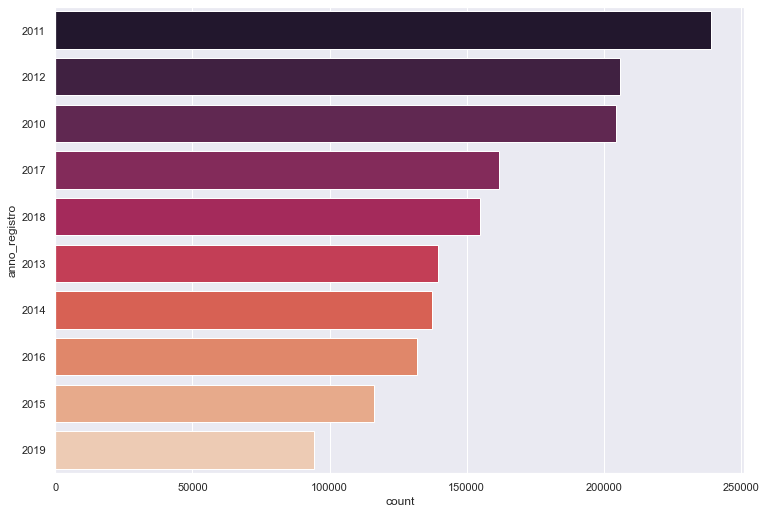

In [96]:
# Gross operations (exports and imports)

sns.set(rc={'figure.figsize':(11, 8)})

sns.countplot(y='anno_registro', data=df_raw, palette='rocket', order=df_raw['anno_registro'].value_counts().index)

In [36]:
# np.save('mgr3-1019.npy', np.array(df_raw))
# np.save('mgr3-1019-colnames.npy', np.array(df_raw.columns))

In [ ]:
# raw = np.load('mgr3-1019.npy', allow_pickle=True)
# raw_cols = np.load('mgr3-1019-colnames.npy', allow_pickle=True)
# df_raw = pd.DataFrame(raw, columns=raw_cols)

In [184]:
# Preview of 5 sample lines of data
print(df_raw.shape)
df_raw.sample(5)

(2043249, 82)


identificador  anno_registro  anno_mes_registro  codigo_aduana  \
12829      5869861077           2019             201903              1   
141291     5569670535           2018             201812              7   
112999     1152920104           2014             201404              9   
66820        21342608           2011             201110              2   
113596     1346397868           2014             201407              9   

        numero_serial  numero_registro numero_declaracion  ingreso_salida  \
12829               4            21557           05377697               1   
141291              4             5023           16628415               1   
112999              3             1338           16605303               0   
66820               4            18262           02110648               1   
113596              3             2533            1714642               0   

       destinacion_mercancia  patron_operacion  regimen agente_aduanas  \
12829                     IM                 4     4000            053   
141291                    IM                 4     4000            166   
112999                    EX                 3     3156            166   
66820                     IM                 4     4000            021   
113596                    EX                 3     3050            171   

       digitador agencia_carga puerto_embarque pais_procedencia  \
12829       A053           N/D             N/D               US   
141291      A166           N/D             N/D               GT   
112999      A166           N/D             N/D               NI   
66820       A021           N/D             N/D               US   
113596      A171           N/D             N/D               HN   

         contribuyente almacen  deposito_fiscal  tipo_transporte  tipo_pago  \
12829   06142704181044     108              NaN              5.0       98.0   
141291  06141011780023    0701              NaN              1.0     9890.0   
112999  06141008091034    0901              NaN              1.0     9890.0   
66820   06141310071018    0200              NaN              3.0     9890.0   
113596  06140406081026    0901              NaN              1.0       95.0   

        codigo_banco  version_declaracion oficial_aduanero  \
12829           98.0                    1             5627   
141291          12.0                    1             5377   
112999           5.0                    1             1207   
66820           27.0                    1             5059   
113596          99.0                    0             5602   

        canal_selectividad  item  inciso_arancelario  inciso_arancelario_old  \
12829                    3   107         33072000000             33072000000   
141291                   3    27         61159600000             61159600000   
112999                   3   146         33049100000             33049100000   
66820                    3   123         96050000000             96050000000   
113596                   3     1         95089000000             95089000000   

       pais_origen_destino pais_origen_destino_old  cant_mercancias  \
12829                   US                      US              0.6   
141291                  MX                      MX              1.0   
112999                  NI                      NI              3.0   
66820                   US                      US              2.0   
113596                  HN                      HN            191.0   

       unidad_medida preferencia_arancelaria identificacion_carga  \
12829             PK                     NaN                  NaN   
141291            PK                     NaN                  NaN   
112999            PK                     NaN                  NaN   
66820             PK                     NaN                  NaN   
113596            PK                     NaN                  NaN   

                                 proveedor consolidadora fecha_arribo  \
12829   

In [38]:
# Check columns (features, attributes)
df_raw.columns

Index(['identificador', 'anno_registro', 'anno_mes_registro', 'codigo_aduana',
       'numero_serial', 'numero_registro', 'numero_declaracion',
       'ingreso_salida', 'destinacion_mercancia', 'patron_operacion',
       'regimen', 'agente_aduanas', 'digitador', 'agencia_carga',
       'puerto_embarque', 'pais_procedencia', 'contribuyente', 'almacen',
       'deposito_fiscal', 'tipo_transporte', 'tipo_pago', 'codigo_banco',
       'version_declaracion', 'oficial_aduanero', 'canal_selectividad', 'item',
       'inciso_arancelario', 'inciso_arancelario_old', 'pais_origen_destino',
       'pais_origen_destino_old', 'cant_mercancias', 'unidad_medida',
       'preferencia_arancelaria', 'identificacion_carga', 'proveedor',
       'consolidadora', 'fecha_arribo', 'fecha_ingreso_almacen',
       'fecha_registro_dua', 'fecha_pago', 'fecha_recepcion_fisica',
       'fecha_asignacion_canal', 'fecha_autorizacion_salida', 'fecha_salida',
       'cif', 'fob', 'flete', 'seguro', 'otros_valores', 'pes

In [230]:
df_raw.dtypes

sistema                   int64
llave_mgr                object
llave                    object
instanceid              float64
anno                      int64
                         ...   
mut_multa_tributaria    float64
mua_multa_admon         float64
adu_adv_antidumping     float64
gty_garantia_de_dm      float64
indicador_incidencia    float64
Length: 86, dtype: object

In [39]:
# IMC importacion de mercancias courier
# IMS importacion de mercancias simplificada
df_raw['destinacion_mercancia'].value_counts()

IM     1585557
EX      227770
IMC     149732
EIT      79325
IMS        659
EIM        205
IEX          1
Name: destinacion_mercancia, dtype: int64

<AxesSubplot:xlabel='count', ylabel='destinacion_mercancia'>

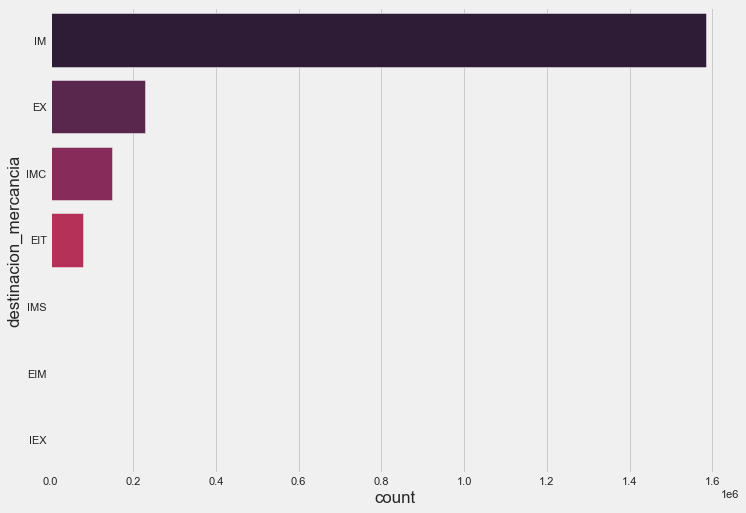

In [185]:
sns.countplot(y='destinacion_mercancia', data=df_raw, palette='rocket', order=df_raw['destinacion_mercancia'].value_counts().index)

In [42]:
df_raw[df_raw['destinacion_mercancia']=='IM'].shape[0] + \
df_raw[df_raw['destinacion_mercancia']=='IMC'].shape[0] + \
df_raw[df_raw['destinacion_mercancia']=='IMS'].shape[0]

1735948

In [186]:
# we only care for imports for now
df_raw = df_raw[df_raw['destinacion_mercancia'] == 'IM']
df_raw.shape

(1585557, 82)

In [46]:
df_raw['pais_procedencia'].value_counts()

US    774442
GT    426275
TE     71049
MX     68515
HN     49973
       ...  
KY         1
IR         1
MQ         1
AM         1
RW         1
Name: pais_procedencia, Length: 138, dtype: int64

<AxesSubplot:xlabel='count', ylabel='actividad_economica'>

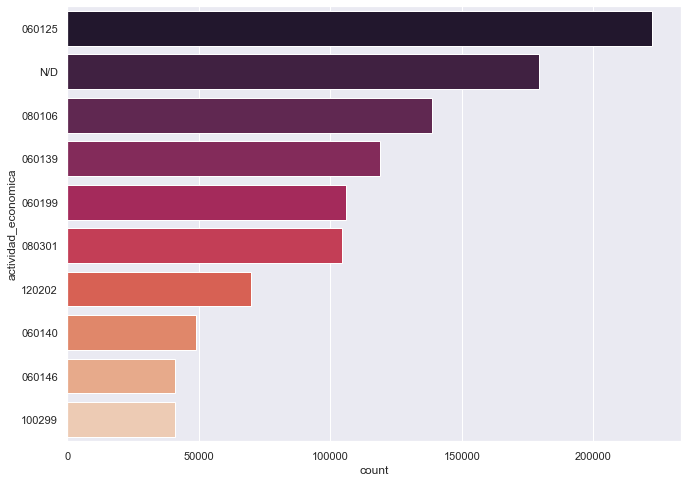

In [67]:
sns.countplot(y='actividad_economica', data=df_raw, palette='rocket', 
              order=df_raw['actividad_economica'].value_counts().iloc[:10].index)

<AxesSubplot:xlabel='count', ylabel='preferencia_arancelaria'>

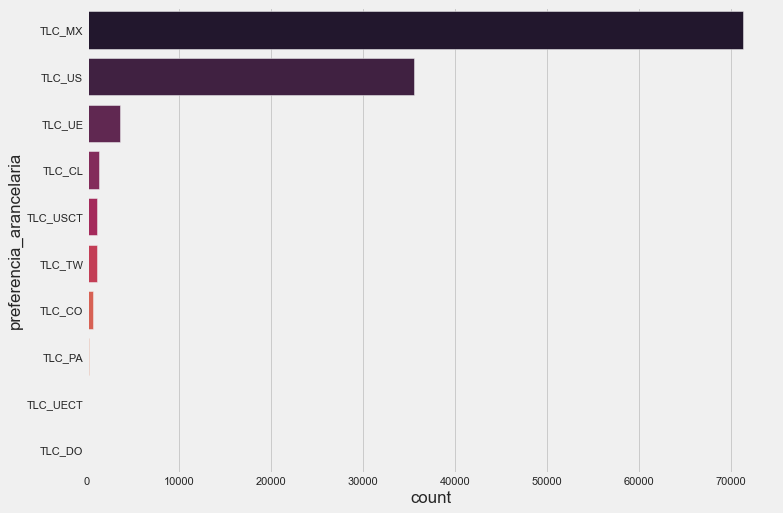

In [166]:
sns.countplot(y='preferencia_arancelaria', data=df_raw, palette='rocket', 
              order=df_raw['preferencia_arancelaria'].value_counts().iloc[:10].index)

<AxesSubplot:xlabel='count', ylabel='pais_origen_destino'>

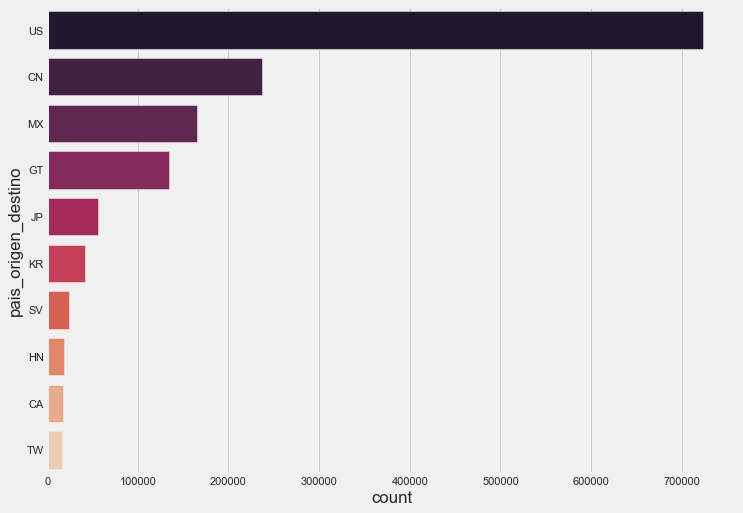

In [168]:
sns.countplot(y='pais_origen_destino', data=df_raw, palette='rocket', 
              order=df_raw['pais_origen_destino'].value_counts().iloc[:10].index)

<AxesSubplot:xlabel='count', ylabel='codigo_banco'>

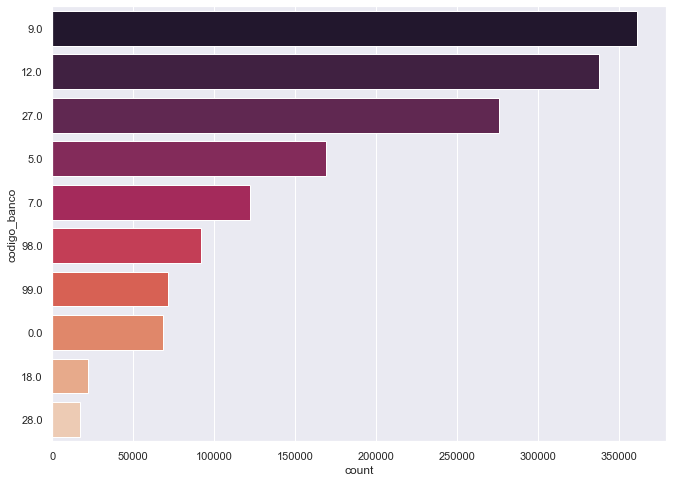

In [68]:
sns.countplot(y='codigo_banco', data=df_raw, palette='rocket', 
              order=df_raw['codigo_banco'].value_counts().iloc[:10].index)

<AxesSubplot:xlabel='count', ylabel='codigo_proveedor'>

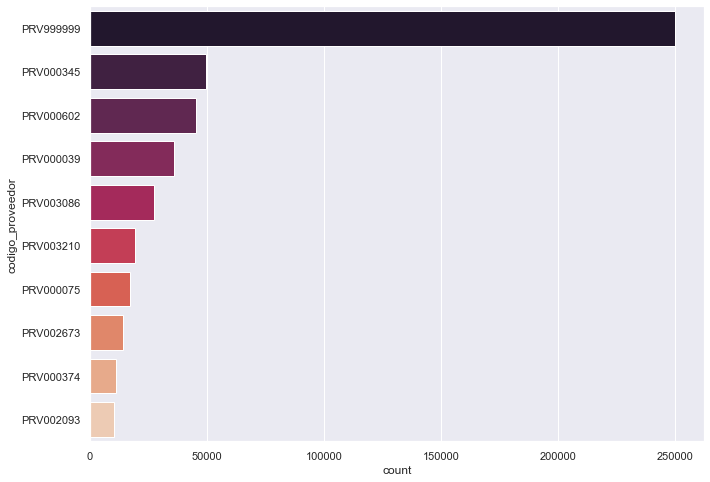

In [70]:
sns.countplot(y='codigo_proveedor', data=df_raw, palette='rocket', 
              order=df_raw['codigo_proveedor'].value_counts().iloc[:10].index)

<AxesSubplot:xlabel='count', ylabel='tipo_pago'>

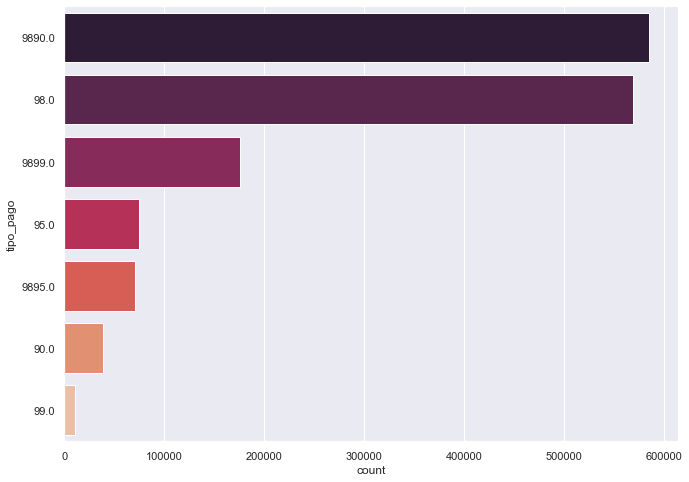

In [72]:
sns.countplot(y='tipo_pago', data=df_raw, palette='rocket', 
              order=df_raw['tipo_pago'].value_counts().iloc[:10].index)

<AxesSubplot:xlabel='count', ylabel='agente_aduanas'>

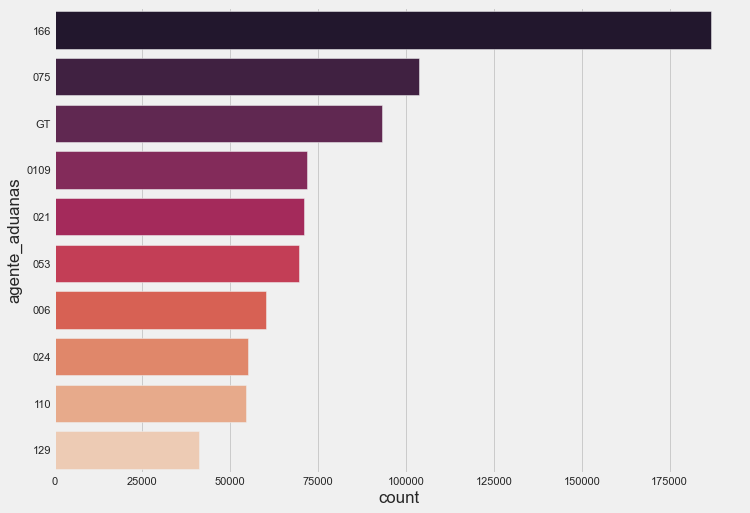

In [187]:
sns.countplot(y='agente_aduanas', data=df_raw, palette='rocket', 
              order=df_raw['agente_aduanas'].value_counts().iloc[:10].index)

<AxesSubplot:xlabel='count', ylabel='codigo_aduana'>

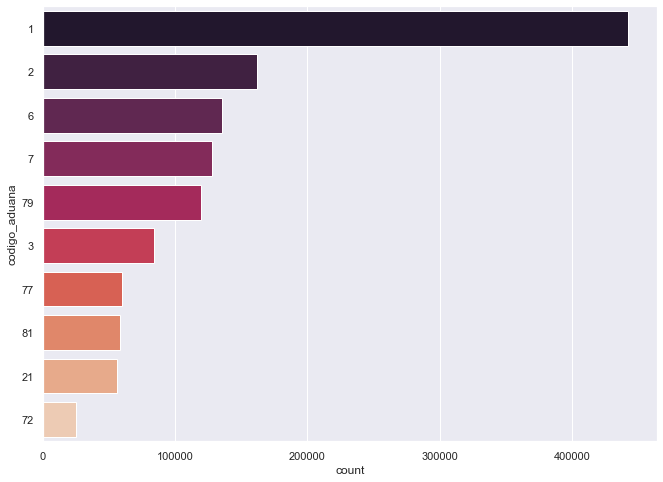

In [71]:
sns.countplot(y='codigo_aduana', data=df_raw, palette='rocket', 
              order=df_raw['codigo_aduana'].value_counts().iloc[:10].index)

In [50]:
df_raw['codigo_aduana'].astype('str')

7          1
8          1
9          1
10         1
11         1
          ..
138492    83
138493    83
138494    83
138495    83
138496    83
Name: codigo_aduana, Length: 1585557, dtype: object

In [82]:
df_raw.sample(5)

identificador  anno_registro  anno_mes_registro  codigo_aduana  \
31245      3377127841           2016             201611              1   
104899     2341884543           2015             201510             21   
124089       21760478           2011             201111              3   
54437        17903262           2010             201004              2   
274281       21855203           2011             201112             79   

        numero_serial  numero_registro numero_declaracion  ingreso_salida  \
31245               4            78325           05347851               1   
104899              5            13637            1716179               1   
124089              5             7004             165510               1   
54437               4             6203           12918168               1   
274281              4              745            1660705               1   

       destinacion_mercancia  patron_operacion  regimen agente_aduanas  \
31245                     IM                 4     4000            053   
104899                    IM                 5     5600            171   
124089                    IM                 5     5100            165   
54437                     IM                 4     4000            129   
274281                    IM                 4     4000            166   

       digitador agencia_carga puerto_embarque pais_procedencia  \
31245       A053           N/D             N/D               US   
104899      A171           N/D             N/D               HN   
124089      A165           N/D             N/D               TE   
54437       A129           N/D             N/D               US   
274281      A166           N/D             N/D               US   

         contribuyente almacen  deposito_fiscal  tipo_transporte  tipo_pago  \
31245   06141008051032    0103              NaN              5.0     9890.0   
104899  06142303001035    2101              NaN              1.0       98.0   
124089  06142508750015    0301              NaN              1.0       98.0   
54437   05202904500018    0200              NaN              3.0       98.0   
274281  05033010081010    7901              NaN              5.0       98.0   

        codigo_banco  version_declaracion oficial_aduanero  \
31245           12.0                    1             1207   
104899          96.0                    1             1022   
124089           0.0                    1             5378   
54437            7.0                    1             5170   
274281           7.0                    1             5213   

        canal_selectividad  item  inciso_arancelario  inciso_arancelario_old  \
31245                    3    14         84073400000             84073400000   
104899                   3     1         38099100000             38099100000   
124089                   3     1         56089000000             56089000000   
54437                    3    24         48202000000             48202000000   
274281                   3    57         85167100000             85167100000   

       pais_origen_destino pais_origen_destino_old  cant_mercancias  \
31245                   JP                      JP             1.00   
104899                  HN                      HN            16.00   
124089                  SV                      SV             1.00   
54437                   US                      US             0.49   
274281                  US                      US             0.06   

       unidad_medida preferencia_arancelaria identificacion_carga  \
31245             PK                     NaN                  NaN   
104899            PK                     NaN                  NaN   
124089            PK                     NaN                  NaN   
54437             CT                     NaN                  NaN   
274281            PK                     NaN                  NaN   

                                  proveedor consolidadora fecha_arribo  \
31245  

In [75]:
df_raw[['dai_variacion']].describe().round(2)

dai_variacion
count     1585557.00
mean            1.42
std            80.27
min             0.00
25%             0.00
50%             0.00
75%             0.00
max         52187.00

In [80]:
(df_raw['dai_nominal'] - df_raw['dai_pagado']).mean()

168.40229161739376

In [54]:
df_raw.columns

Index(['identificador', 'anno_registro', 'anno_mes_registro', 'codigo_aduana',
       'numero_serial', 'numero_registro', 'numero_declaracion',
       'ingreso_salida', 'destinacion_mercancia', 'patron_operacion',
       'regimen', 'agente_aduanas', 'digitador', 'agencia_carga',
       'puerto_embarque', 'pais_procedencia', 'contribuyente', 'almacen',
       'deposito_fiscal', 'tipo_transporte', 'tipo_pago', 'codigo_banco',
       'version_declaracion', 'oficial_aduanero', 'canal_selectividad', 'item',
       'inciso_arancelario', 'inciso_arancelario_old', 'pais_origen_destino',
       'pais_origen_destino_old', 'cant_mercancias', 'unidad_medida',
       'preferencia_arancelaria', 'identificacion_carga', 'proveedor',
       'consolidadora', 'fecha_arribo', 'fecha_ingreso_almacen',
       'fecha_registro_dua', 'fecha_pago', 'fecha_recepcion_fisica',
       'fecha_asignacion_canal', 'fecha_autorizacion_salida', 'fecha_salida',
       'cif', 'fob', 'flete', 'seguro', 'otros_valores', 'pes

In [61]:
df_raw['inciso_arancelario'][7]

40112090000

In [238]:
# df_raw.loc[:, 'inciso'] = df_raw['inciso'].astype(pd.Int32Dtype())
# df_raw.loc[:, 'inciso_ext'] = df_raw['inciso_ext'].astype(pd.Int32Dtype())

In [186]:
#df_raw.loc[:, 'inciso'] = df_raw['inciso'].astype('str')
#df_raw.loc[:, 'inciso_ext'] = df_raw['inciso_ext'].astype('str')
#df_raw.loc[:, 'anno'] = df_raw['anno'].astype('str')
#df_raw.loc[:, 'aduana'] = df_raw['aduana'].astype('str')

In [239]:
df_raw['inciso_ara'] = df_raw.loc[:,'inciso'] + df_raw.loc[:,'inciso_ext']

In [242]:
#'fob_item',  'flete_externo_item', 'flete_interno_item', 'seguro_item', 'otros_gastos_item', 'deducciones_item', 'costos_item', 'cif_item',
impuestos = ['dai_item', 'iva_item', 'impuestos_itm', 'flete_item', 'ace_adv_cerveza', 'aci_adv_tabaco', 'aiv_anticipo_iva', 'ema_adv_expl_mun_arm', 
             'otg_otras_tasas', 'otr_otras_tasas', 'otg_otras_tasas' , 'ppi_adv_expl_mun_arma' ,'cec_tasa_cont_esp_ciu' ,'alc_adv_alcohol' ,'ebe_esp_bebidas' ,
             'ece_esp_cerveza' ,'eci_esp_tabaco' ,'elc_esp_alcohol' ,'its_iva_servicio' ,'abe_adv_bebidas_energ' ,'abc_adv_bebidas' ,'abd_adv_bebidas_depor' ,
             'apm_ant_primera_matricula' ,'eqp_dai_import' ,'opm_otr_primera_matricula' ,'vts_tasa_prest_servicio']

In [188]:
impuestos = ['dai_pagado', 'iva_pagado', 'alc_pagado', 'otros_tributo_pagado']

In [85]:
pd.notna(sum(df_raw[impuestos[2]]))

True

## Sum all taxes

In [189]:
# for x in impuestos:
#     if pd.notna(sum(df_raw[x])):
#         df_raw['impuesto_total'] += df_raw[x]

df_raw.loc[:, 'impuesto_total'] = df_raw[impuestos].sum(axis=1)

<AxesSubplot:xlabel='impuesto_total', ylabel='Density'>

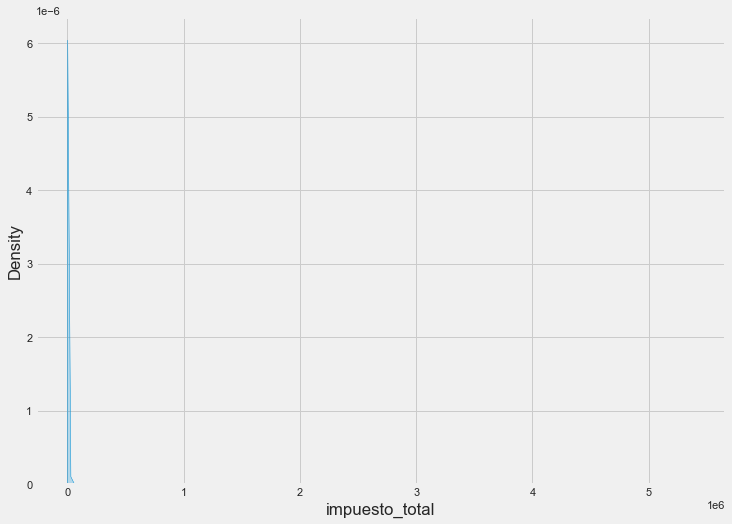

In [99]:
#df_raw['impuesto_total']
#print(np.mean(df_raw['impuesto_total']))

plt.style.use('fivethirtyeight')
sns.kdeplot(data=df_raw, x="impuesto_total", shade=True, log_scale=False)

In [245]:

# sns.kdeplot(data=df_raw, x="cif_estadistico_item", shade=True, log_scale=True)
# sns.kdeplot(data=df_raw, x="cif_item", shade=True, log_scale=True)

np.mean(df_raw['cif_estadistico_item'] - df_raw['cif_item'])

0.17026820296451756

In [100]:
df_raw.columns

Index(['identificador', 'anno_registro', 'anno_mes_registro', 'codigo_aduana',
       'numero_serial', 'numero_registro', 'numero_declaracion',
       'ingreso_salida', 'destinacion_mercancia', 'patron_operacion',
       'regimen', 'agente_aduanas', 'digitador', 'agencia_carga',
       'puerto_embarque', 'pais_procedencia', 'contribuyente', 'almacen',
       'deposito_fiscal', 'tipo_transporte', 'tipo_pago', 'codigo_banco',
       'version_declaracion', 'oficial_aduanero', 'canal_selectividad', 'item',
       'inciso_arancelario', 'inciso_arancelario_old', 'pais_origen_destino',
       'pais_origen_destino_old', 'cant_mercancias', 'unidad_medida',
       'preferencia_arancelaria', 'identificacion_carga', 'proveedor',
       'consolidadora', 'fecha_arribo', 'fecha_ingreso_almacen',
       'fecha_registro_dua', 'fecha_pago', 'fecha_recepcion_fisica',
       'fecha_asignacion_canal', 'fecha_autorizacion_salida', 'fecha_salida',
       'cif', 'fob', 'flete', 'seguro', 'otros_valores', 'pes

In [101]:
df_raw[['variacion_administrativa', 'variacion_tributaria']].sum()

variacion_administrativa    1988644.50
variacion_tributaria        6518954.58
dtype: float64

In [190]:
print(df_raw[(df_raw['variacion_administrativa'] > 0) | (df_raw['variacion_tributaria'] > 0)].shape)
df_raw[(df_raw['variacion_administrativa'] > 0) | (df_raw['variacion_tributaria'] > 0)]

(68101, 83)


identificador  anno_registro  anno_mes_registro  codigo_aduana  \
112          17239669           2010             201001              1   
190          17246479           2010             201001              1   
191          17246490           2010             201001              1   
192          17246520           2010             201001              1   
193          17246448           2010             201001              1   
...               ...            ...                ...            ...   
135123     6049406890           2019             201907             77   
135364     6090356675           2019             201908             77   
136212     5980114664           2019             201905             80   
136532     6196858376           2019             201911             80   
136609     5720137807           2019             201902             81   

        numero_serial  numero_registro numero_declaracion  ingreso_salida  \
112                 4              134           12917475               1   
190                 4              390             021439               1   
191                 4              390             021439               1   
192                 4              390             021439               1   
193                 4              390             021439               1   
...               ...              ...                ...             ...   
135123              4             9162           06010195               1   
135364              4            10957           06011995               1   
136212              4             2399            1703178               1   
136532              4             5032            1707705               1   
136609              4              282             163632               1   

       destinacion_mercancia  patron_operacion  regimen agente_aduanas  \
112                       IM                 4     4000            129   
190                       IM                 4     4000            021   
191                       IM                 4     4000            021   
192                       IM                 4     4000            021   
193                       IM                 4     4000            021   
...                      ...               ...      ...            ...   
135123                    IM                 4     4000            060   
135364                    IM                 4     4000            060   
136212                    IM                 4     4000            170   
136532                    IM                 4     4000            170   
136609                    IM                 4     4000            163   

       digitador agencia_carga puerto_embarque pais_procedencia  \
112         A129           N/D             N/D               US   
190         A021           N/D             N/D               US   
191         A021           N/D             N/D               US   
192         A021           N/D             N/D               US   
193         A021           N/D             N/D               US   
...          ...           ...             ...              ...   
135123      A060           N/D             N/D               US   
135364      A060           N/D             N/D               US   
136212      A170           N/D             N/D               US   
136532      A170           N/D             N/D               US   
136609      A163           N/D             N/D               PA   

         contribuyente almacen  deposito_fiscal  tipo_transporte  tipo_pago  \
112     06141108041018    0108              NaN              3.0     9895.0   
190     95010701701019    0108              NaN              1.0       98.0   
191     95010701701019    0108              NaN              1.0       98.0   
192     95010701701019    0108              NaN              1.0       98.0   
193     95010701701019    0108              NaN              1.0       98.0   
...                ...    

## Creating outcome variable (y)

In [191]:
#df_raw['illicit'] = np.where( (df_raw[['mut_multa_tributaria', 'mua_multa_admon']].sum(axis=1) > 0), 1, 0 )
df_raw.loc[:, 'illicit'] = np.where( (df_raw['variacion_administrativa'] > 0) | (df_raw['variacion_tributaria'] > 0), 1, 0 )
df_raw.loc[:, 'revenue'] = df_raw['variacion_administrativa'] + df_raw['variacion_tributaria']

<AxesSubplot:xlabel='anno_registro'>

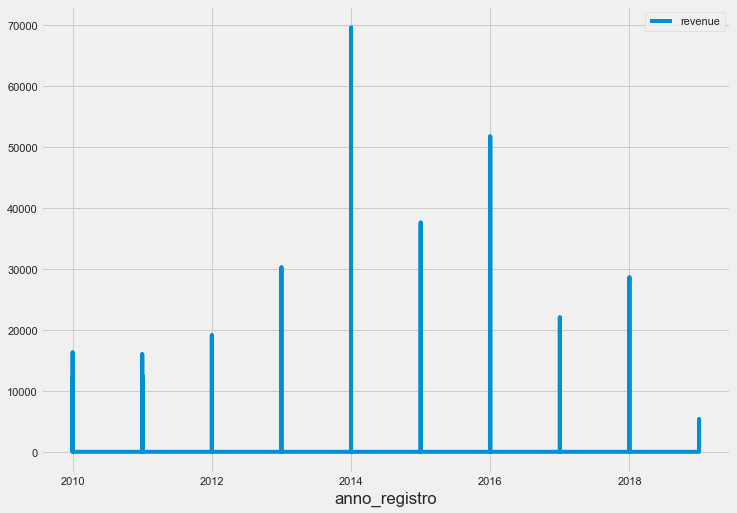

In [194]:
df_raw.plot('anno_registro', 'revenue')

In [177]:
for x in df_raw['anno_registro'].unique():
    print(f"illicit counts - {x}:")
    print(df_raw[df_raw['anno_registro'] == x]['illicit'].value_counts())
    print()
    print(f'illicit prop - {x}:')
    print(df_raw[df_raw['anno_registro'] == x]['illicit'].value_counts(normalize=True)* 100)

illicit counts - 2010:
0    195248
1      9029
Name: illicit, dtype: int64

illicit prop - 2010:
0    95.580021
1     4.419979
Name: illicit, dtype: float64
illicit counts - 2011:
0    228966
1     10305
Name: illicit, dtype: int64

illicit prop - 2011:
0    95.693168
1     4.306832
Name: illicit, dtype: float64
illicit counts - 2012:
0    198643
1      7231
Name: illicit, dtype: int64

illicit prop - 2012:
0    96.487657
1     3.512343
Name: illicit, dtype: float64
illicit counts - 2013:
0    132646
1      7019
Name: illicit, dtype: int64

illicit prop - 2013:
0    94.974403
1     5.025597
Name: illicit, dtype: float64
illicit counts - 2014:
0    132319
1      4959
Name: illicit, dtype: int64

illicit prop - 2014:
0    96.387622
1     3.612378
Name: illicit, dtype: float64
illicit counts - 2015:
0    110148
1      6039
Name: illicit, dtype: int64

illicit prop - 2015:
0    94.802344
1     5.197656
Name: illicit, dtype: float64
illicit counts - 2016:
0    126111
1      5896
Name: illic

In [108]:
print(df_raw[df_raw['illicit'] == 0]['variacion_administrativa'].sum())
print(df_raw[df_raw['illicit'] == 0]['variacion_tributaria'].sum())

0.0
0.0


In [110]:
df_raw.columns

Index(['identificador', 'anno_registro', 'anno_mes_registro', 'codigo_aduana',
       'numero_serial', 'numero_registro', 'numero_declaracion',
       'ingreso_salida', 'destinacion_mercancia', 'patron_operacion',
       'regimen', 'agente_aduanas', 'digitador', 'agencia_carga',
       'puerto_embarque', 'pais_procedencia', 'contribuyente', 'almacen',
       'deposito_fiscal', 'tipo_transporte', 'tipo_pago', 'codigo_banco',
       'version_declaracion', 'oficial_aduanero', 'canal_selectividad', 'item',
       'inciso_arancelario', 'inciso_arancelario_old', 'pais_origen_destino',
       'pais_origen_destino_old', 'cant_mercancias', 'unidad_medida',
       'preferencia_arancelaria', 'identificacion_carga', 'proveedor',
       'consolidadora', 'fecha_arribo', 'fecha_ingreso_almacen',
       'fecha_registro_dua', 'fecha_pago', 'fecha_recepcion_fisica',
       'fecha_asignacion_canal', 'fecha_autorizacion_salida', 'fecha_salida',
       'cif', 'fob', 'flete', 'seguro', 'otros_valores', 'pes

In [199]:
df_raw.loc[:, 'anno_mes_registro'] = df_raw['anno_mes_registro'].astype(str) 
df_raw.loc[:, 'mes'] = df_raw['anno_mes_registro'].str[-2:]
df_raw.loc[:, 'mes'] = df_raw['mes'].astype(int)

In [200]:
df_raw.mes.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [201]:
# Select columns to use
# columns_to_use = ['year', 'month', 'day', 'OFFICE', 'IMPORTER.TIN',
#        'TARIFF.CODE', 'ORIGIN.CODE', 'CIF_USD_EQUIVALENT', 'QUANTITY',
#        'GROSS.WEIGHT','TOTAL.TAXES.USD', 'illicit']

columns_to_use = [
    'anno_registro', 'mes', 'codigo_aduana', 'contribuyente', 'inciso_arancelario', 'pais_origen_destino', 
    'cif', 'cant_mercancias', 'peso_bruto','impuesto_total', 'illicit'
]

df_raw = df_raw[columns_to_use]

In [203]:
df_raw.dtypes

anno_registro            int64
mes                      int32
codigo_aduana            int64
contribuyente           object
inciso_arancelario       int64
pais_origen_destino     object
cif                    float64
cant_mercancias        float64
peso_bruto             float64
impuesto_total         float64
illicit                  int32
dtype: object

In [204]:
# Define categorical variables
# categorical_variables = [
#     'year', 'month', 'day', 'OFFICE', 'IMPORTER.TIN',
#     'TARIFF.CODE', 'ORIGIN.CODE'
# ]

#categorical_variables = ['anno', 'aduana', 'contribuyente', 'inciso_ara', 'pais_origen']

categorical_variables = ['anno_registro', 'mes', 'codigo_aduana'] + [x for x in df_raw.columns if df_raw[x].dtype == 'object']

# Transform/confirm data type of categorical variables as string
df_raw.loc[:,categorical_variables] = df_raw.loc[:,categorical_variables].astype(str)

D:\Users\javia\anaconda3\envs\ai\lib\site-packages\pandas\core\indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


# 2. Preprocess data

In [205]:
# Make a copy not to change the original data (to be used later)
df = df_raw.copy()

## 2.1. Step-by-Step
### 2.1.1. Create additional numeric variables

In [206]:
df.columns

Index(['anno_registro', 'mes', 'codigo_aduana', 'contribuyente',
       'inciso_arancelario', 'pais_origen_destino', 'cif', 'cant_mercancias',
       'peso_bruto', 'impuesto_total', 'illicit'],
      dtype='object')

In [207]:
# create additional numeric variables
# df.loc[:, 'Unitprice'] = df['CIF_USD_EQUIVALENT']/df['QUANTITY']
# df.loc[:, 'WUnitprice'] = df['CIF_USD_EQUIVALENT']/df['GROSS.WEIGHT']
# df.loc[:, 'TaxRatio'] = df['TOTAL.TAXES.USD'] / df['CIF_USD_EQUIVALENT']
# df.loc[:, 'TaxUnitquantity'] = df['TOTAL.TAXES.USD'] / df['QUANTITY']
df.loc[:, 'Unitprice'] = df['cif']/df['cant_mercancias']
df.loc[:, 'WUnitprice'] = df['cif']/df['peso_bruto']
df.loc[:, 'TaxRatio'] = df['impuesto_total'] / df['cif']
df.loc[:, 'TaxUnitquantity'] = df['impuesto_total'] / df['peso_bruto']

In [208]:
df.sample(5)

anno_registro mes codigo_aduana   contribuyente  inciso_arancelario  \
93895           2013  12             6  94832509521020         42022900000   
183072          2012   2            21  06140602081093         96032100000   
184716          2010   2            76  06142311600013         85044000000   
41026           2010  11             1  06141603991030         39231000000   
220677          2017  12            77  03152411881020         87043151000   

       pais_origen_destino      cif  cant_mercancias  peso_bruto  \
93895                   GT   333.35             1.00       70.00   
183072                  CN    38.25             4.00        9.00   
184716                  CN   170.60             1.36        1.68   
41026                   US   773.39             2.00      118.28   
220677                  US  4716.36             1.00     2132.00   

        impuesto_total  illicit    Unitprice  WUnitprice  TaxRatio  \
93895            93.33        1   333.350000    4.762143  0.279976   
183072           11.44        0     9.562500    4.250000  0.299085   
184716           22.17        0   125.441176  101.547619  0.129953   
41026           100.54        0   386.695000    6.538637  0.129999   
220677          879.59        0  4716.360000    2.212176  0.186498   

        TaxUnitquantity  
93895          1.333286  
183072         1.271111  
184716        13.196429  
41026          0.850017  
220677         0.412566

In [210]:
df.describe().round(2)

inciso_arancelario          cif  cant_mercancias   peso_bruto  \
count        1.585557e+06   1585557.00       1585557.00   1585557.00   
mean         6.381687e+10      3905.01            49.46      2664.75   
std          2.624451e+10     65428.41           613.60    134141.16   
min          1.011010e+09         0.00             0.00         0.01   
25%          3.926400e+10        24.18             0.17         5.19   
50%          7.020010e+10       151.57             1.00        32.51   
75%          8.536509e+10      1463.30             4.00       413.00   
max          9.801002e+10  41424625.16        241581.00  84073400.00   

       impuesto_total     illicit   Unitprice  WUnitprice    TaxRatio  \
count      1585557.00  1585557.00  1585557.00  1585557.00  1579621.00   
mean           607.45        0.04         inf      105.35         inf   
std           8153.28        0.20         NaN     8054.04         NaN   
min              0.00        0.00        0.00        0.00        0.00   
25%              3.41        0.00       26.66        1.25        0.13   
50%             23.42        0.00      160.86        4.10        0.24   
75%            236.04        0.00     1139.94       11.83        0.30   
max        5385251.27        1.00         inf  2933041.73         inf   

       TaxUnitquantity  
count       1585557.00  
mean             18.56  
std            1312.53  
min               0.00  
25%               0.21  
50%               0.78  
75%               2.28  
max          622142.00

In [211]:
df.isnull().T.any().T.sum()

5936

In [214]:
print(f"Dimensions: {df.shape}")
nan_rows = df[df.isnull().T.any()]
nan_rows

Dimensions: (1585557, 15)


anno_registro mes codigo_aduana   contribuyente  inciso_arancelario  \
388             2010   1             1  06140101130031         87033263000   
390             2010   1             1  02100707011019         87043151000   
392             2010   1             1  06141703001046         87043151000   
2737            2010   1             1  07090712751015         87021060000   
3395            2010   2             1  02022001480019         87032373000   
...              ...  ..           ...             ...                 ...   
122678          2019  10            26  06141301041076         39231090000   
122679          2019  10            26  06141301041076         39235090000   
122681          2019  10            26  06141301041076         39231090000   
122682          2019  10            26  06141301041076         39235090000   
122683          2019  10            26  06141301041076         39235090000   

       pais_origen_destino  cif  cant_mercancias  peso_bruto  impuesto_total  \
388                     US  0.0              1.0      2893.0             0.0   
390                     US  0.0              1.0      4700.0             0.0   
392                     US  0.0              1.0      4500.0             0.0   
2737                    US  0.0              1.0      2500.0             0.0   
3395                    US  0.0              1.0      1935.0             0.0   
...                    ...  ...              ...         ...             ...   
122678                  US  0.0             52.0      3328.0             0.0   
122679                  US  0.0             52.0       364.0             0.0   
122681                  US  0.0             49.0      3136.0             0.0   
122682                  US  0.0             13.0        91.0             0.0   
122683                  US  0.0             36.0       252.0             0.0   

        illicit  Unitprice  WUnitprice  TaxRatio  TaxUnitquantity  
388           0        0.0         0.0       NaN              0.0  
390           0        0.0         0.0       NaN              0.0  
392           0        0.0         0.0       NaN              0.0  
2737          0        0.0         0.0       NaN              0.0  
3395          0        0.0         0.0       NaN              0.0  
...         ...        ...         ...       ...              ...  
122678        0        0.0         0.0       NaN              0.0  
122679        0        0.0         0.0       NaN              0.0  
122681        0        0.0         0.0       NaN              0.0  
122682        0        0.0         0.0       NaN              0.0  
122683        0        0.0         0.0       NaN              0.0  

[5936 rows x 15 columns]

### 2.1.2. Create additional categorical variables: Merge features/attributes

### Generate HS6 code 

In [216]:
df = df.dropna()

In [298]:
df.loc[:, 'inciso_ara'] = (
    df['inciso_ara'].astype(float)
    .where(df.loc[:, 'inciso_ara'].notnull())
)

In [311]:
#48209000
df['inciso_ara'].where(df['inciso_ara'].notnull()).apply(lambda x: int(x) // 1000).astype(str)

74083       8101
74084       7061
74085       7099
74086       8112
74087       7051
           ...  
1263350    84659
1263351    84672
1263352    84672
1263353    84672
1263354    84681
Name: inciso_ara, Length: 965351, dtype: object

In [219]:
df['inciso_arancelario'].apply(lambda x: int(x) // 100000000).astype(str)

7         401
8         401
9         401
10        401
11        401
         ... 
138492    870
138493    870
138494    870
138495    870
138496    870
Name: inciso_arancelario, Length: 1579621, dtype: object

In [291]:
df.loc[:, 'HS6'] = df['inciso_arancelario'].apply(lambda x: int(x) // 100000).astype(str) #HS10digit
df.loc[:, 'HS4'] = df['HS6'].apply(lambda x: int(x) // 100).astype(str)
df.loc[:, 'HS2'] = df['HS4'].apply(lambda x: int(x) // 100).astype(str)

In [290]:
df

anno_registro mes codigo_aduana   contribuyente  inciso_arancelario  \
7               2010   1             1  12171609921018         40112090000   
8               2010   1             1  12171609921018         40112010000   
9               2010   1             1  12171609921018         40111000000   
10              2010   1             1  12171609921018         40111000000   
11              2010   1             1  12171609921018         40112010000   
...              ...  ..           ...             ...                 ...   
138492          2019  10            83  12171306680010         87032190000   
138493          2019  10            83  06140104740014         87043161000   
138494          2019  11            83  12171306680010         87042151000   
138495          2019  11            83  12171306680010         87032369000   
138496          2019  11            83  12171306680010         87042290000   

       pais_origen_destino        cif  cant_mercancias  peso_bruto  \
7                       CR    2835.84             36.0      595.00   
8                       CR   34171.35            418.0     6559.19   
9                       CR   29896.06            612.0     6114.92   
10                      CR   34104.78            700.0     6927.72   
11                      CR   32664.47            396.0     6248.19   
...                    ...        ...              ...         ...   
138492                  IN    7199.07              1.0      870.00   
138493                  ID   48039.19              5.0     5875.00   
138494                  MX  158725.54             10.0    16530.00   
138495                  MX  115010.39              8.0     8968.00   
138496                  JP  159813.84              4.0    20220.00   

        impuesto_total  illicit  
7               368.65        0  
8              4442.27        0  
9              3886.48        0  
10             4433.62        0  
11             4246.38        0  
...                ...      ...  
138492         2562.86        0  
138493         8959.29        0  
138494        29602.30        0  
138495        47441.77        0  
138496        22581.68        0  

[1585557 rows x 11 columns]

### Example: Merging 'OFFICE' and 'IMPORTER.TIN'
This new feature is useful to check whether there is any collusion btw importers and Customs offices.

In [224]:
# Set the new column name
ColName = 'codigo_aduana'+'&'+'contribuyente'
ColName

'codigo_aduana&contribuyente'

In [225]:
# Merge the two columns
df.loc[:,ColName] = df.loc[:,'codigo_aduana']+'&'+df.loc[:,'contribuyente']
df.loc[:5, ColName]

D:\Users\javia\anaconda3\envs\ai\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Users\javia\anaconda3\envs\ai\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


KeyError: 5

### Example: Merging all the pairs among the selected categorical variables

In [232]:
# set environment
import itertools

# Create all the pairs (combinations)
combinations = list(itertools.combinations(['codigo_aduana', 'contribuyente','HS6', 'pais_origen_destino'], 2))
combinations

[('codigo_aduana', 'contribuyente'),
 ('codigo_aduana', 'HS6'),
 ('codigo_aduana', 'pais_origen_destino'),
 ('contribuyente', 'HS6'),
 ('contribuyente', 'pais_origen_destino'),
 ('HS6', 'pais_origen_destino')]

In [233]:
# Run a loop for merging attributes 
for (cat1, cat2) in combinations:
    ColName = cat1 + '&' + cat2
    df.loc[:,ColName] = df.loc[:,cat1]+'&'+df.loc[:,cat2]

df.head()

anno_registro mes codigo_aduana   contribuyente  inciso_arancelario  \
7           2010   1             1  12171609921018         40112090000   
8           2010   1             1  12171609921018         40112010000   
9           2010   1             1  12171609921018         40111000000   
10          2010   1             1  12171609921018         40111000000   
11          2010   1             1  12171609921018         40112010000   

   pais_origen_destino       cif  cant_mercancias  peso_bruto  impuesto_total  \
7                   CR   2835.84             36.0      595.00          368.65   
8                   CR  34171.35            418.0     6559.19         4442.27   
9                   CR  29896.06            612.0     6114.92         3886.48   
10                  CR  34104.78            700.0     6927.72         4433.62   
11                  CR  32664.47            396.0     6248.19         4246.38   

    illicit  Unitprice  WUnitprice  TaxRatio  TaxUnitquantity     HS6   HS4  \
7         0  78.773333    4.766118  0.129997         0.619580  401120  4011   
8         0  81.749641    5.209691  0.130000         0.677259  401120  4011   
9         0  48.849771    4.889035  0.130000         0.635573  401110  4011   
10        0  48.721114    4.922944  0.130000         0.639983  401110  4011   
11        0  82.486035    5.227829  0.130000         0.679618  401120  4011   

   HS2 codigo_aduana&contribuyente codigo_aduana&HS6  \
7   40            1&12171609921018          1&401120   
8   40            1&12171609921018          1&401120   
9   40            1&12171609921018          1&401110   
10  40            1&12171609921018          1&401110   
11  40            1&12171609921018          1&401120   

   codigo_aduana&pais_origen_destino      contribuyente&HS6  \
7                               1&CR  12171609921018&401120   
8                               1&CR  12171609921018&401120   
9                               1&CR  12171609921018&401110   
10                              1&CR  12171609921018&401110   
11                              1&CR  12171609921018&401120   

   contribuyente&pais_origen_destino HS6&pais_origen_destino  
7                  12171609921018&CR               401120&CR  
8                  12171609921018&CR               401120&CR  
9                  12171609921018&CR               401110&CR  
10                 12171609921018&CR               401110&CR  
11                 12171609921018&CR               401120&CR

### 2.1.3. Risk profiling
Histories in legal compliance of importers is a good risk indicator. 
In addition, as machines accept only numbers not classes/categories, risk profiling is a good way of transforming categorical variables to numeric variables. 

### Identify high-risk importer list (High-risk list)

In [234]:
# 1) Group data by importers, 2) count the number of frauds for each importer, 3) sort the top 5 fraudulent importers

df.groupby('contribuyente')['illicit'].sum().sort_values(ascending=False)[:5]

contribuyente
06141011780023    7102
05033010081010    4635
06140602081093    2388
12172209081017    1476
02102806580061    1272
Name: illicit, dtype: int32

In [235]:
# 1) Group data by importers, 2) Calculate number of imports, number of frauds, and ratio of frauds for each importer

def fraud_ratio(x):
    return x.sum()/x.count()

importer_risk_profiles = df.groupby('contribuyente')['illicit'].agg(['count', 'sum', fraud_ratio])
importer_risk_profiles.columns = ['N_imports', 'N_frauds', 'Ratio_frauds']

# Present 5 samples of risk profiling
importer_risk_profiles.sample(5)

N_imports  N_frauds  Ratio_frauds
contribuyente                                    
04070303711018         73         0           0.0
06143110420018          1         0           0.0
05151109781033          1         0           0.0
13053112610013          1         0           0.0
06083008801015          1         0           0.0

### Tag 'RiskH' to the imports of the top 10% high risky importers

In [236]:
# Find the top 10% of risky importers, and tag them as "Risk.H" (identify a blacklist)
N_importers = df['contribuyente'].nunique()
N_top10pct = int(0.1 * N_importers) + 1
RiskH = list(importer_risk_profiles['N_frauds'].sort_values(ascending=False).head(N_top10pct).index)

# Tagging 1 for the importers are in the blacklist
df['RiskH.contribuyente'] = np.where(df['contribuyente'].isin(RiskH), 1, 0)

# Print 5 samples of tags
df[['contribuyente', 'RiskH.contribuyente']].sample(5)

contribuyente  RiskH.contribuyente
131149  06141011780023                    1
110571  06141011780023                    1
101414  13190611151015                    1
289977  02032105881017                    0
149935  06141402151026                    0

## 2.2. One shot approach with functions
So far, we explored how to transform data with some examples. 
Now, we will construct functions which can implement the above process automatically.

In [237]:
# Reload data
df = df_raw.copy()

In [238]:
# Create additional numeric and categorical variables

def preprocess(df:pd.DataFrame, 
               args:list):
    """
    dtype df: dataframe
    dtype *args: strings (attribute names that want to be combined)
    """
    # create additional numeric variables
    df.loc[:, 'Unitprice'] = df['cif']/df['cant_mercancias']
    df.loc[:, 'WUnitprice'] = df['cif']/df['peso_bruto']
    df.loc[:, 'TaxRatio'] = df['impuesto_total'] / df['cif']
    df.loc[:, 'TaxUnitquantity'] = df['impuesto_total'] / df['peso_bruto']
    
    # Create HS sub-classes
    df.loc[:, 'HS6'] = df['inciso_arancelario'].apply(lambda x: int(x) // 100000).astype(str) #HS10digit
    df.loc[:, 'HS4'] = df['HS6'].apply(lambda x: int(x) // 100).astype(str)
    df.loc[:, 'HS2'] = df['HS4'].apply(lambda x: int(x) // 100).astype(str)
    
    # Merge attributes
    
    df.loc[:,args] = df.loc[:,args].astype(str)
    
    # Generate all the pairs available from the selected categorical variables
    import itertools
    combinations = list(itertools.combinations(args, 2))
    
    # Run a loop for merging attributes 
    for (cat1, cat2) in combinations:
        ColName = cat1 + '&' + cat2
        df.loc[:,ColName] = df.loc[:,cat1]+'&'+df.loc[:,cat2]
    
    return df


# Identify high risky entities (importer, declarants, HScodes, Offices, origin countries, etc.)
def risk_profiling(df:pd.DataFrame, 
                   feature:str, 
                   topk_ratio:float):
    
    N_top10pct = int(df[feature].nunique()*topk_ratio)+1
    RiskH_list = list(df.groupby(feature)['illicit'].sum().sort_values(ascending=True).head(N_top10pct).index)
    
    return RiskH_list


def risk_tagging(df:pd.DataFrame, 
                 feature:str, 
                 RiskH_list:list):
    
    df.loc[:,'RiskH.'+feature] = np.where(df.loc[:,feature].isin(RiskH_list),1,0)
    
    return df

In [239]:
print(df['anno_registro'].value_counts(normalize=False))
df['anno_registro'].value_counts(normalize=True)

2011    239271
2012    205874
2010    204277
2017    161764
2018    154957
2013    139665
2014    137278
2016    132007
2015    116187
2019     94277
Name: anno_registro, dtype: int64


2011    0.150907
2012    0.129843
2010    0.128836
2017    0.102023
2018    0.097730
2013    0.088086
2014    0.086580
2016    0.083256
2015    0.073278
2019    0.059460
Name: anno_registro, dtype: float64

In [241]:
# split train/valid/test set

train = df[df['anno_registro']=='2011']
test = df[df['anno_registro']=='2012']
print("Now, train-data has {} entries and {} features".format(*train.shape))
print("Now, test-data has {} entries and {} features".format(*test.shape))

Now, train-data has 239271 entries and 11 features
Now, test-data has 205874 entries and 11 features


In [251]:
train

anno_registro mes codigo_aduana   contribuyente inciso_arancelario  \
90              2011   1             1  06142102971109        29051200000   
91              2011   1             1  05180809630011        87043159000   
92              2011   1             1  06143008800030        87032480000   
93              2011   1             1  04071212541027        87043151000   
94              2011   1             1  06141603991030        34029020000   
...              ...  ..           ...             ...                ...   
305837          2011  12            83  07100403771023        87042290000   
305838          2011  12            83  05112908951019        87021070000   
305839          2011  12            83  05112908951019        87021070000   
305840          2011  12            83  03152604751018        87032369000   
305841          2011  12            83  96632008641015        87033273000   

       pais_origen_destino       cif  cant_mercancias  peso_bruto  \
90                      US  31141.00              1.0    22000.00   
91                      US   7828.24              1.0     2585.00   
92                      US  38853.59              1.0     2730.00   
93                      US   5205.49              1.0     2268.00   
94                      US   1468.57              1.0      757.36   
...                    ...       ...              ...         ...   
305837                  US   2350.00              1.0    11340.00   
305838                  US   5350.00              1.0    13607.00   
305839                  US   5712.71              1.0    13607.00   
305840                  US   1300.00              1.0     1660.00   
305841                  JP  32968.25              1.0     2770.00   

        impuesto_total  illicit  Unitprice  WUnitprice  TaxRatio  \
90             4048.33        0   31141.00    1.415500  0.130000   
91             1184.40        0    7828.24    3.028333  0.151298   
92            18610.85        0   38853.59   14.232084  0.478999   
93             1068.06        0    5205.49    2.295190  0.205180   
94              190.91        0    1468.57    1.939065  0.129997   
...                ...      ...        ...         ...       ...   
305837          355.55        0    2350.00    0.207231  0.151298   
305838          809.45        0    5350.00    0.393180  0.151299   
305839          864.31        0    5712.71    0.419836  0.151296   
305840          549.25        0    1300.00    0.783133  0.422500   
305841            0.00        0   32968.25   11.901895  0.000000   

        TaxUnitquantity     HS6   HS4 HS2 codigo_aduana&contribuyente  \
90             0.184015  290512  2905  29            1&06142102971109   
91             0.458182  870431  8704  87            1&05180809630011   
92             6.817161  870324  8703  87            1&06143008800030   
93             0.470926  870431  8704  87            1&04071212541027   
94             0.252073  340290  3402  34            1&06141603991030   
...                 ...     ...   ...  ..                         ...   
305837         0.031354  870422  8704  87           83&07100403771023   
305838         0.059488  870210  8702  87           83&05112908951019   
305839         0.063520  870210  8702  87           83&05112908951019   
305840         0.330873  870323  8703  87           83&03152604751018   
305841         0.000000  870332  8703  87           83&96632008641015   

       codigo_aduana&inciso_arancelario codigo_aduana&pais_origen_destino  \
90                        1&29051200000                              1&US   
91                        1&87043159000                              1&US   
92                        1&87032480000                              1&US   
93                        1&87043151000                              1&US   
94                        1&34029020000                              1&US   
...                                 ...                               ...   
305837              

In [313]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)
print("Now, train-data has {} entries and {} features".format(*train.shape))
print("Now, test-data has {} entries and {} features".format(*test.shape))

Now, train-data has 772280 entries and 10 features
Now, test-data has 193071 entries and 10 features


In [242]:
# Preprocess train and test
train = preprocess(train, ['codigo_aduana', 'contribuyente','inciso_arancelario', 'pais_origen_destino'])
test = preprocess(test, ['codigo_aduana', 'contribuyente','inciso_arancelario', 'pais_origen_destino'])

D:\Users\javia\anaconda3\envs\ai\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Users\javia\anaconda3\envs\ai\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
D:\Users\javia\anaconda3\envs\ai\lib\site-packages\pandas\core\indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [243]:
profile_candidates = ['codigo_aduana', 'contribuyente','inciso_arancelario', 'HS6', 'HS4', 'HS2', 'pais_origen_destino']\
+[col for col in train.columns if '&' in col]

In [244]:
# Risk profiling
for feature in profile_candidates:
    # Identify high risky entities 
    RiskH_list = risk_profiling(train, feature, 0.1)
    # Tag 'RiskH'
    train = risk_tagging(train, feature, RiskH_list)
    # Attention: Tags for test data are built from train data (not from test data)
    test = risk_tagging(test, feature, RiskH_list)

D:\Users\javia\anaconda3\envs\ai\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Users\javia\anaconda3\envs\ai\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [245]:
train.sample(5)

anno_registro mes codigo_aduana   contribuyente inciso_arancelario  \
156877          2011   8             6  06141011780023        61178010000   
20204           2011   6             1  14081803771017        33071000000   
6229            2011   2             1  02101911710016        84818020000   
8545            2011   3             1  06142101911013        83062900000   
304144          2011  12            81  06140505051040        49019900000   

       pais_origen_destino      cif  cant_mercancias  peso_bruto  \
156877                  MX    63.81             1.00        1.85   
20204                   US    10.31             0.10        1.20   
6229                    CO  3054.20            14.00      258.20   
8545                    CN  1196.43           132.90     1882.98   
304144                  US   224.19             0.88       51.83   

        impuesto_total  illicit   Unitprice  WUnitprice  TaxRatio  \
156877            8.29        0   63.810000   34.491892  0.129917   
20204             3.08        0  103.100000    8.591667  0.298739   
6229            811.19        0  218.157143   11.828815  0.265598   
8545            358.32        0    9.002483    0.635392  0.299491   
304144            0.00        0  254.761364    4.325487  0.000000   

        TaxUnitquantity     HS6   HS4 HS2 codigo_aduana&contribuyente  \
156877         4.481081  611780  6117  61            6&06141011780023   
20204          2.566667  330710  3307  33            1&14081803771017   
6229           3.141712  848180  8481  84            1&02101911710016   
8545           0.190294  830629  8306  83            1&06142101911013   
304144         0.000000  490199  4901  49           81&06140505051040   

       codigo_aduana&inciso_arancelario codigo_aduana&pais_origen_destino  \
156877                    6&61178010000                              6&MX   
20204                     1&33071000000                              1&US   
6229                      1&84818020000                              1&CO   
8545                      1&83062900000                              1&CN   
304144                   81&49019900000                             81&US   

       contribuyente&inciso_arancelario contribuyente&pais_origen_destino  \
156877       06141011780023&61178010000                 06141011780023&MX   
20204        14081803771017&33071000000                 14081803771017&US   
6229         02101911710016&84818020000                 02101911710016&CO   
8545         06142101911013&83062900000                 06142101911013&CN   
304144       06140505051040&49019900000                 06140505051040&US   

       inciso_arancelario&pais_origen_destino  RiskH.codigo_aduana  \
156877                         61178010000&MX                    0   
20204                          33071000000&US                    0   
6229                           84818020000&CO                    0   
8545                           83062900000&CN                    0   
304144                         49019900000&US                    0   

        RiskH.contribuyente  RiskH.inciso_arancelario  RiskH.HS6  RiskH.HS4  \
156877                    0                         1          0          0   
20204                     0                         0          0          0   
6229                      0                         0          0          0   
8545                      0                         0          0          0   
304144                    0                         0          0          0   

        RiskH.HS2  RiskH.pais_origen_destino  \
156877          0                          0   
20204           0                          0   
6229            0                          0   
8545            0                          0   
304144          0                          0   

        RiskH.codigo_aduana&contribuyente  \
156877                                  0   
20204                                   0   
6229                               

In [246]:
print(test.shape)
test.sample(5)

(205874, 37)


anno_registro mes codigo_aduana   contribuyente inciso_arancelario  \
7276            2012   1             1  06141811981014        32091010000   
77568           2012   6             2  02102212691016        61034200000   
230662          2012   2            79  11171503751012        85167100000   
69449           2012   3             2  02102012571032        42022200000   
17824           2012   4             1  06141603991030        73211190000   

       pais_origen_destino      cif  cant_mercancias  peso_bruto  \
7276                    GT     0.00             1.00       60.45   
77568                   US  1141.18             0.64        3.07   
230662                  US    57.97             0.04        9.48   
69449                   US   122.60             0.50       10.00   
17824                   CN  1326.77             1.00      359.18   

        impuesto_total  illicit   Unitprice  WUnitprice  TaxRatio  \
7276             23.23        0     0.00000    0.000000       inf   
77568           341.77        0  1783.09375  371.719870  0.299488   
230662           17.35        0  1449.25000    6.114979  0.299293   
69449            36.71        0   245.20000   12.260000  0.299429   
17824           322.39        0  1326.77000    3.693886  0.242989   

        TaxUnitquantity     HS6   HS4 HS2 codigo_aduana&contribuyente  \
7276           0.384285  320910  3209  32            1&06141811981014   
77568        111.325733  610342  6103  61            2&02102212691016   
230662         1.830169  851671  8516  85           79&11171503751012   
69449          3.671000  420222  4202  42            2&02102012571032   
17824          0.897572  732111  7321  73            1&06141603991030   

       codigo_aduana&inciso_arancelario codigo_aduana&pais_origen_destino  \
7276                      1&32091010000                              1&GT   
77568                     2&61034200000                              2&US   
230662                   79&85167100000                             79&US   
69449                     2&42022200000                              2&US   
17824                     1&73211190000                              1&CN   

       contribuyente&inciso_arancelario contribuyente&pais_origen_destino  \
7276         06141811981014&32091010000                 06141811981014&GT   
77568        02102212691016&61034200000                 02102212691016&US   
230662       11171503751012&85167100000                 11171503751012&US   
69449        02102012571032&42022200000                 02102012571032&US   
17824        06141603991030&73211190000                 06141603991030&CN   

       inciso_arancelario&pais_origen_destino  RiskH.codigo_aduana  \
7276                           32091010000&GT                    0   
77568                          61034200000&US                    0   
230662                         85167100000&US                    0   
69449                          42022200000&US                    0   
17824                          73211190000&CN                    0   

        RiskH.contribuyente  RiskH.inciso_arancelario  RiskH.HS6  RiskH.HS4  \
7276                      0                         0          0          0   
77568                     0                         0          0          0   
230662                    0                         0          0          0   
69449                     0                         0          0          0   
17824                     0                         0          0          0   

        RiskH.HS2  RiskH.pais_origen_destino  \
7276            0                          0   
77568           0                          0   
230662          0                          0   
69449           0                          0   
17824           0                          0   

        RiskH.codigo_aduana&contribuyente  \
7276                                    0   
77568                                   0   
230662                             

# 3. Visualization

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

In [248]:
train.columns

Index(['anno_registro', 'mes', 'codigo_aduana', 'contribuyente',
       'inciso_arancelario', 'pais_origen_destino', 'cif', 'cant_mercancias',
       'peso_bruto', 'impuesto_total', 'illicit', 'Unitprice', 'WUnitprice',
       'TaxRatio', 'TaxUnitquantity', 'HS6', 'HS4', 'HS2',
       'codigo_aduana&contribuyente', 'codigo_aduana&inciso_arancelario',
       'codigo_aduana&pais_origen_destino', 'contribuyente&inciso_arancelario',
       'contribuyente&pais_origen_destino',
       'inciso_arancelario&pais_origen_destino', 'RiskH.codigo_aduana',
       'RiskH.contribuyente', 'RiskH.inciso_arancelario', 'RiskH.HS6',
       'RiskH.HS4', 'RiskH.HS2', 'RiskH.pais_origen_destino',
       'RiskH.codigo_aduana&contribuyente',
       'RiskH.codigo_aduana&inciso_arancelario',
       'RiskH.codigo_aduana&pais_origen_destino',
       'RiskH.contribuyente&inciso_arancelario',
       'RiskH.contribuyente&pais_origen_destino',
       'RiskH.inciso_arancelario&pais_origen_destino'],
      dtype='object'

## Identify top fraudulent importers

In [249]:
data = train.groupby('contribuyente')['illicit'].sum().reset_index()
data = data.sort_values('illicit', ascending = False)
data.rename(columns={'illicit':'N_frauds'}, inplace=True)
data.head(5)

contribuyente  N_frauds
1906  06141011780023      1650
305   02102212691016       585
667   05033010081010       516
4864  12172209081017       434
2301  06141409490089       409

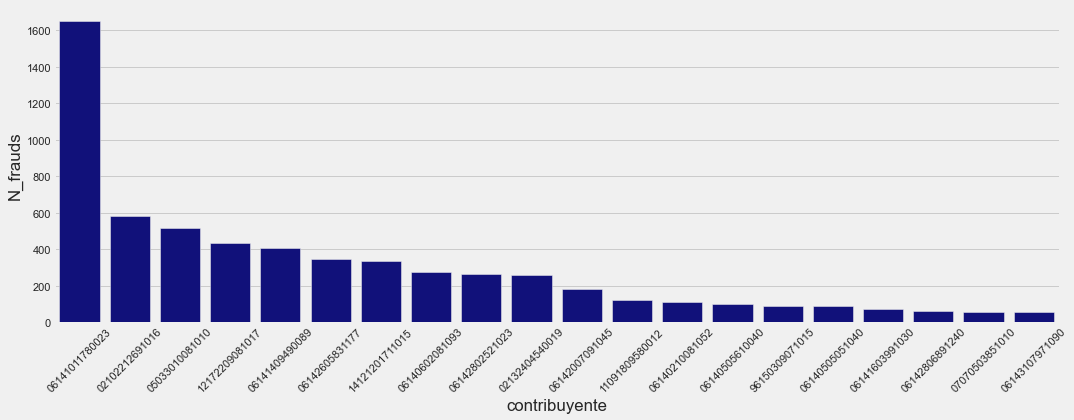

In [250]:
fig = sns.catplot(x='contribuyente',
                  y='N_frauds',
                  data = data.iloc[:20,:],
                  color='darkblue',
                  kind='bar',
                  height=5, # make the plot 5 units high
                  aspect=3) # width should be three times height)
fig.set_xticklabels(rotation=45)

In [265]:
# Interactive visualization

fig = px.bar(data.iloc[:20,:], x="contribuyente", y="N_frauds", )
fig.show()

In [267]:
fig.write_html("./top20-imp-frauds-2011.html")

## Identify top fraudulent pairs of offices and importers

In [269]:
data = train.groupby('codigo_aduana&contribuyente')['illicit'].sum().reset_index()
data = data.sort_values('illicit', ascending = False)
data.rename(columns={'illicit':'N_frauds'}, inplace=True)
data.head(5)

codigo_aduana&contribuyente  N_frauds
4758            6&06141011780023      1640
1949            2&02102212691016       585
7355           79&05033010081010       497
646             1&06141409490089       408
993             1&06142605831177       347

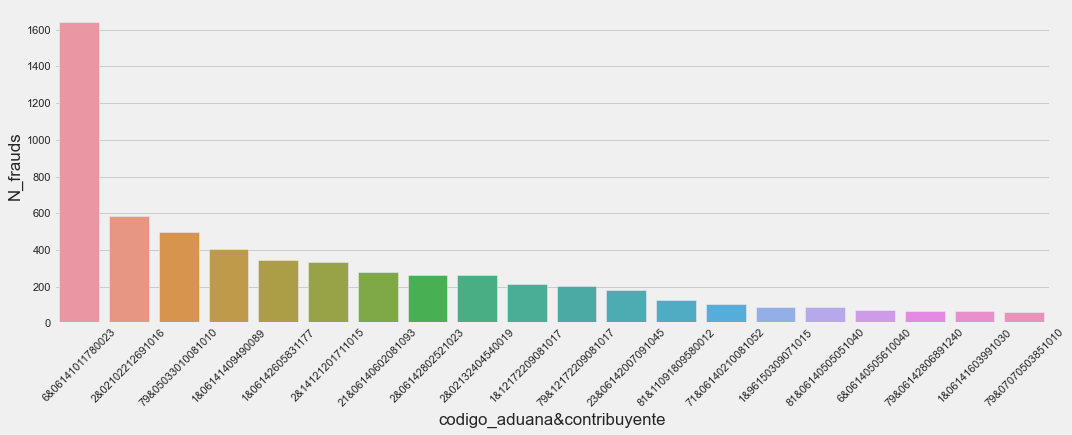

In [270]:
fig = sns.catplot(x='codigo_aduana&contribuyente',
                  y='N_frauds',
                  data = data.iloc[:20,:],
                  kind='bar',
                  height=5, # make the plot 5 units high
                  aspect=3) # width should be three times height)
fig.set_xticklabels(rotation=45)

In [271]:
# Interactive visualization

fig = px.bar(data.iloc[:20,:], x="codigo_aduana&contribuyente", y="N_frauds")
fig.show()

In [272]:
fig.write_html("./top20-aduana&contribuyente-frauds-2011.html")

## Distribution of numeric variables

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1585557 entries, 7 to 138496
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   anno_registro        1585557 non-null  object 
 1   mes                  1585557 non-null  object 
 2   codigo_aduana        1585557 non-null  object 
 3   contribuyente        1585557 non-null  object 
 4   inciso_arancelario   1585557 non-null  int64  
 5   pais_origen_destino  1585557 non-null  object 
 6   cif                  1585557 non-null  float64
 7   cant_mercancias      1585557 non-null  float64
 8   peso_bruto           1585557 non-null  float64
 9   impuesto_total       1585557 non-null  float64
 10  illicit              1585557 non-null  int32  
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 179.1+ MB


D:\Users\javia\anaconda3\envs\ai\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\Users\javia\anaconda3\envs\ai\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\Users\javia\anaconda3\envs\ai\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\Users\javi

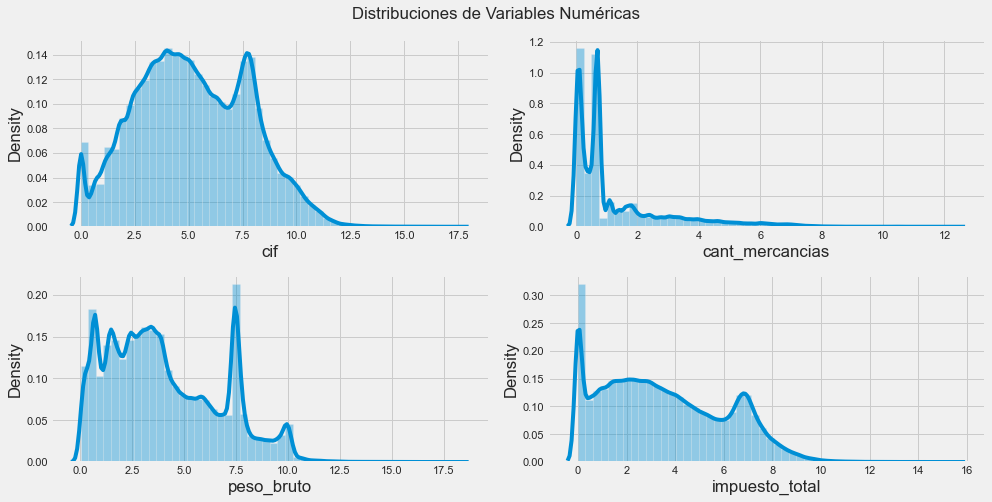

In [274]:
numeric_vars = [x for x in df.columns if df[x].dtype == 'float64']

# Set figure size
plt.figure(figsize=(14, 10))

for i, var in enumerate(numeric_vars):
    plt.subplot(3, 2, i+1)
    sns.distplot(df[var].apply(np.log1p), kde=True) # https://numpy.org/doc/stable/reference/generated/numpy.log1p.html
    #sns.displot(data=df, x=var, kind='kde', log_scale=True)
    plt.suptitle("Distribuciones de Variables Numéricas")
    plt.tight_layout()

## K-means clustering

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [6]:
os.chdir(r'C:\Users\javia\Dropbox\Master\DGA\Modelo de Selectividad')

In [329]:
# np.save('item-cols.npy', df.columns.to_numpy())
# np.save('items-df.npy', df)
# df.to_csv('items-df.csv', index=False)

In [11]:
arr = np.load('items-df.npy', allow_pickle=True)
arr_cols = np.load('item-cols.npy', allow_pickle=True)

In [330]:
#df = pd.DataFrame(arr, columns=arr_cols)
df = pd.read_csv('items-df.csv')
df

D:\Users\javia\anaconda3\envs\ai\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning:

Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.



anno  aduana   contribuyente  inciso_ara pais_origen  cif_item  \
0       2018       1  94831303561037   8101000.0          GT   1939.91   
1       2018       1  94831303561037   7061000.0          GT     61.37   
2       2018       1  94831303561037   7099390.0          GT     43.84   
3       2018       1  94831303561037   8112000.0          GT     13.15   
4       2018       1  94831303561037   7051100.0          GT    107.40   
...      ...     ...             ...         ...         ...       ...   
965346  2018       5  06142709061020  84659200.0          CN    901.54   
965347  2018       5  06142709061020  84672100.0          CN   2497.55   
965348  2018       5  06142709061020  84672200.0          CN    569.85   
965349  2018       5  06142709061020  84672900.0          CN   2099.20   
965350  2018       5  06142709061020  84681000.0          CN    569.97   

        cuantia  peso_bruto  impuesto_total  illicit  
0       5352.48     5352.48          652.15        0  
1        635.04      635.04           56.61        0  
2        362.88      362.88           14.72        0  
3        136.08      136.08            4.40        0  
4       1270.08     1270.08           36.10        0  
...         ...         ...             ...      ...  
965346     4.00      251.00          251.31        0  
965347   128.00      251.00          696.22        0  
965348    36.00      251.00          158.85        0  
965349    65.00      251.00          585.16        0  
965350     6.00      251.00          158.87        0  

[965351 rows x 10 columns]

In [331]:
df.dtypes

anno                int64
aduana              int64
contribuyente      object
inciso_ara        float64
pais_origen        object
cif_item          float64
cuantia           float64
peso_bruto        float64
impuesto_total    float64
illicit             int64
dtype: object

In [332]:
data = df.copy()

data.loc[:, 'aduana'] = data['aduana'].astype('str')
data.loc[:, 'inciso_ara'] = data['inciso_ara'].astype('str')


In [333]:
data.dtypes

anno                int64
aduana             object
contribuyente      object
inciso_ara         object
pais_origen        object
cif_item          float64
cuantia           float64
peso_bruto        float64
impuesto_total    float64
illicit             int64
dtype: object

In [408]:
data = df.copy()

#data = data.drop(['anno'], axis=1)
data.loc[:, 'anno'] = data['anno'].astype('int')
data.loc[:, 'aduana'] = data['aduana'].astype('str')
data.loc[:, 'inciso_ara'] = data['inciso_ara'].astype('str')

for x in data.columns: 
    if data[x].dtype == 'object':
        data[x] = data[x].astype('category').cat.codes
        

In [334]:
data.isna().sum()

anno              0
aduana            0
contribuyente     0
inciso_ara        0
pais_origen       4
cif_item          0
cuantia           0
peso_bruto        0
impuesto_total    0
illicit           0
dtype: int64

In [23]:
data = data.dropna()

In [24]:
data.isna().sum()

anno              0
aduana            0
contribuyente     0
inciso_ara        0
pais_origen       0
cif_item          0
cuantia           0
peso_bruto        0
impuesto_total    0
illicit           0
dtype: int64

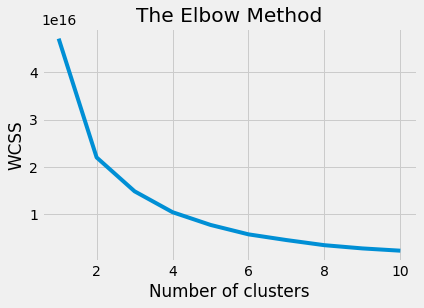

In [413]:
# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans

X = data.copy()

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [503]:
print("Performing PCA...")
pca = PCA(n_components=7, random_state=1)
X_pca = pca.fit_transform(X_norm)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_.round(2)))

Performing PCA...
Explained variation per principal component: [0.48 0.21 0.17 0.08 0.03 0.02 0.02]


Finding best k...
Estimated number of clusters: 13


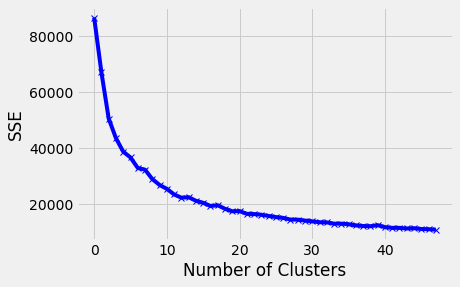

In [513]:
X = data.copy()

# normalize features
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(copy=False)
X_norm = normalizer.fit_transform(X)

# print("Performing PCA...")
# pca = PCA(n_components=0.95, random_state=1)
# X_pca = pca.fit_transform(X_norm)
# print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

print("Finding best k...")
iters =  50
sse = []
for i in range(2, iters):
    #kmean= KMeans(i, init='k-means++', verbose=0)
    kmean= MiniBatchKMeans(i, batch_size=5000, init='k-means++', verbose=0)
    kmean.fit(X_norm)
    sse.append(kmean.inertia_)   

plt.style.use("fivethirtyeight")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.plot(sse, 'bx-')

from kneed import KneeLocator

kl = KneeLocator(range(2, iters), sse, curve="convex", direction="decreasing")
n_clusters = kl.elbow

print(f"Estimated number of clusters: {n_clusters}")

In [510]:
# fit k-mean clustering
#kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=5000, init='k-means++', random_state=0)

# predict our clusters for each description
cluster_pred = kmeans.fit_predict(X_norm)

# display by groups
df_plot = pd.DataFrame(list(X_norm), list(cluster_pred))
df_plot = df_plot.reset_index()
df_plot.rename(columns = {'index': 'Cluster'}, inplace = True)
df_plot['Cluster'] = df_plot['Cluster'].astype(int)

print(df_plot.head())

print(df_plot.groupby('Cluster').agg({'Cluster': 'count'}))

   Cluster         0         1         2         3         4         5  \
0        7  0.294944  0.001315  0.870078  0.325622  0.004090  0.116996   
1        7  0.302114  0.001347  0.891228  0.333836  0.004190  0.007003   
2        7  0.301779  0.001345  0.890242  0.334214  0.004185  0.048069   
3        7  0.300763  0.001341  0.887244  0.333089  0.004171  0.036681   
4        0  0.226610  0.001010  0.668493  0.250966  0.003143  0.437030   

          6         7         8    9  
0  0.164783  0.064596  0.070080  0.0  
1  0.053869  0.002478  0.004193  0.0  
2  0.035873  0.015913  0.028791  0.0  
3  0.096530  0.015059  0.021970  0.0  
4  0.420222  0.051577  0.261779  0.0  
         Cluster
Cluster         
0          41532
1          20584
2          15387
3         111126
4          68176
5          39219
6          20037
7          97541
8          12006


Text(0.01, 0.5, 'Component n')

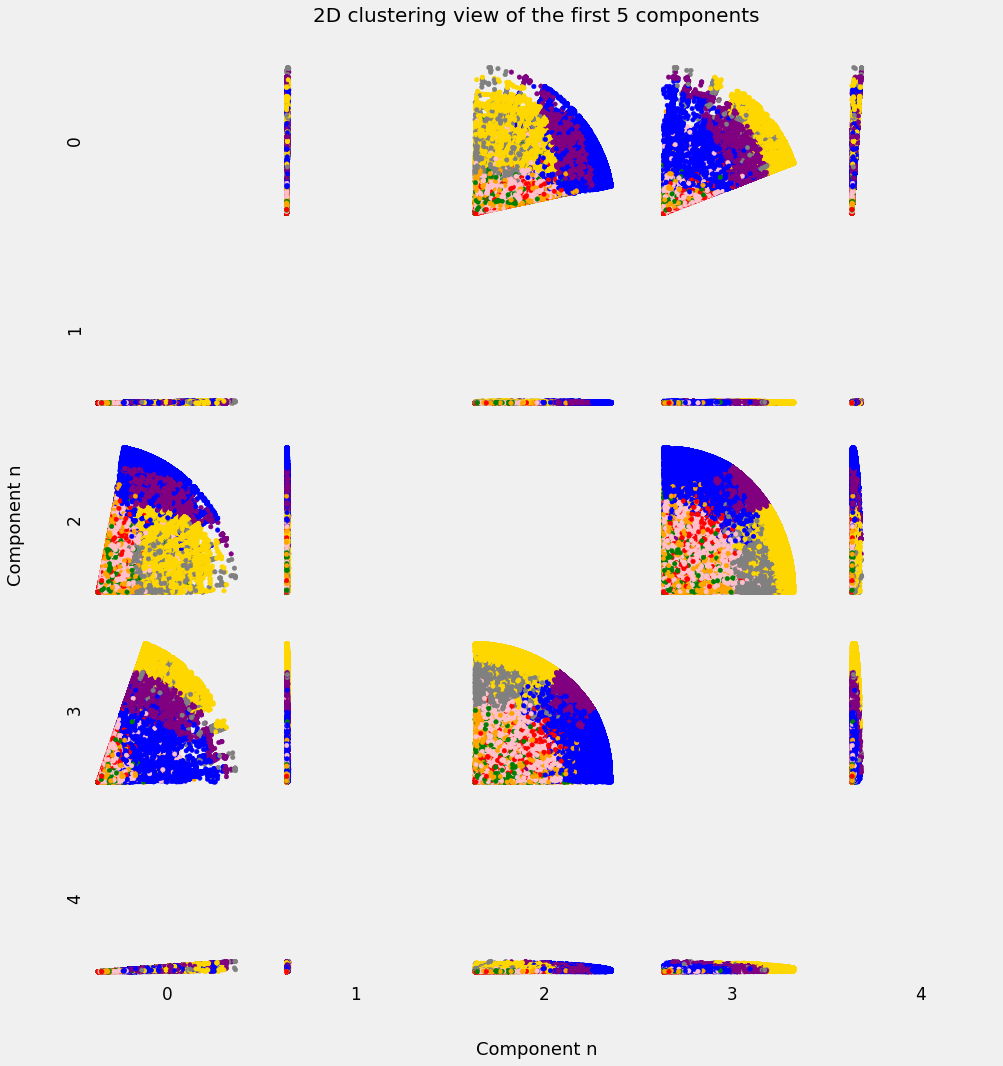

In [511]:
# make a column for color by clusters
col = df_plot['Cluster'].map({0:'b', 1:'r', 2: 'g', 3:'purple', 4:'gold', 5:'pink', 6:'orange', 7:'blue', 8:'gray'})

# variable for first n dimensions we want to plot
n = 5

# visualize the clusters by first n dimensions (reduced)
fig, ax = plt.subplots(n, n, sharex=True, sharey=True, figsize=(15,15))
fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

# plot it
k = 0
for i in range(0, n):
    for j in range(0, n):
        if i != j:
            df_plot.plot(kind = 'scatter', x=j, y=i, c=col, ax = ax[i][j], fontsize = 18)
        else:
            ax[i][j].set_xlabel(i)
            ax[i][j].set_ylabel(j)
            ax[i][j].set_frame_on(False)
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])

plt.style.use("fivethirtyeight")   
plt.suptitle('2D clustering view of the first {} components'.format(n), fontsize = 20)
fig.text(0.5, 0.01, 'Component n', ha='center', fontsize = 18)
fig.text(0.01, 0.5, 'Component n', va='center', rotation='vertical', fontsize = 18)

Computing t-SNE...
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 4256 samples in 0.026s...
[t-SNE] Computed neighbors for 4256 samples in 1.507s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4256
[t-SNE] Computed conditional probabilities for sample 2000 / 4256
[t-SNE] Computed conditional probabilities for sample 3000 / 4256
[t-SNE] Computed conditional probabilities for sample 4000 / 4256
[t-SNE] Computed conditional probabilities for sample 4256 / 4256
[t-SNE] Mean sigma: 0.023901
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.486988
[t-SNE] KL divergence after 1000 iterations: 0.546166
t-SNE Done.


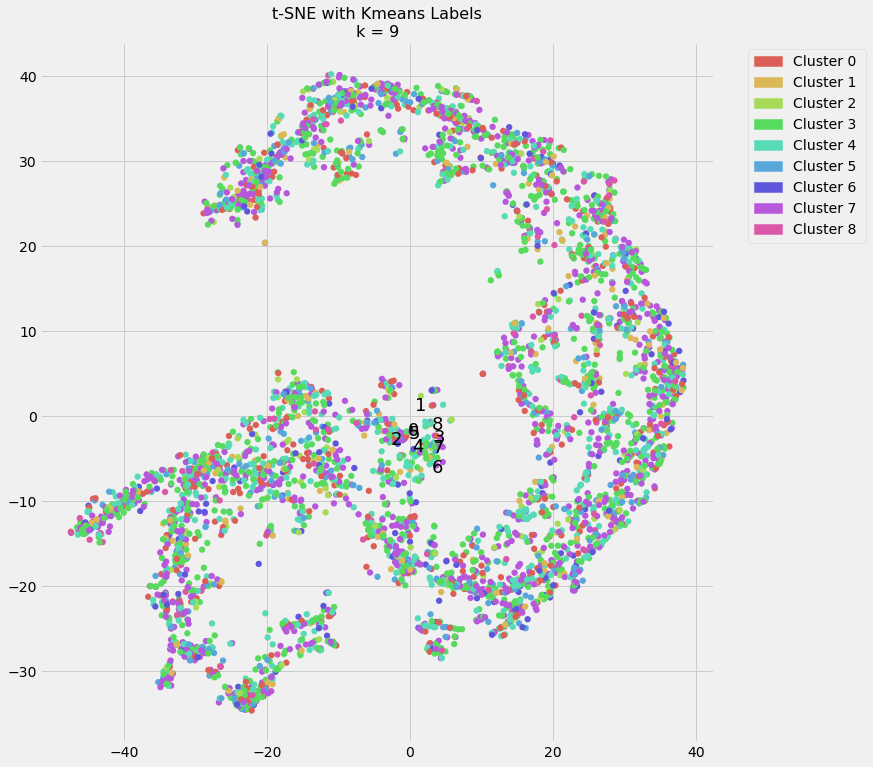


Saved t-SNE plot.


In [512]:
tsne_cos = TSNE(n_components=2,
                perplexity=100,  # 30
                learning_rate=1000,
                n_iter=1000,
                metric='cosine',
                verbose=1)

X_sample = pd.DataFrame(X_norm).sample(frac=0.01).to_numpy()
dist = 1 - cosine_similarity(X_sample)

print("Computing t-SNE...")
tsne_cos_coords = tsne_cos.fit_transform(dist)
print("t-SNE Done.")

def tsne_scatter(x, labels):
    n_labels = len(set(labels))
    palette = np.array(sns.color_palette("hls", n_labels))  # color palette with seaborn.
    f = plt.figure(figsize=(18, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:, 0], x[:, 1], linewidth=0, s=40, color=palette[labels])
    # ax.axis('off')
    ax.axis('tight')
    txts = []
    color_patches = []
    for i in range(n_labels):
        # Position of each label
        patch = mpatches.Patch(color=palette[i], label="Cluster %i " % i) 
        color_patches.append(patch)
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=18)
        txts.append(txt)
    plt.legend(handles=color_patches, bbox_to_anchor=(1.04, 1), loc="upper left", fontsize=14)
    plt.subplots_adjust(right=0.60)
    plt.title("t-SNE with Kmeans Labels" + "\n" + "k = %s" % n_clusters, fontsize=16)
    plt.savefig("tsne-cluster-sample.png")
    plt.show()
    print()
    print("Saved t-SNE plot.")

sample_label = pd.DataFrame(cluster_pred).sample(frac=0.01).to_numpy().flatten()
tsne_scatter(tsne_cos_coords, sample_label)

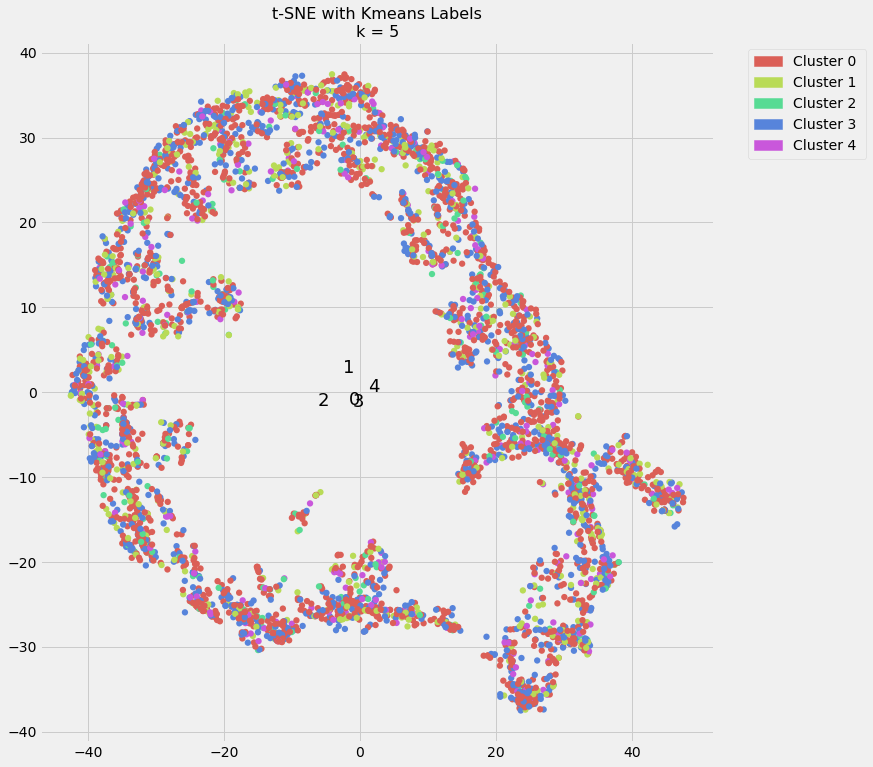


Saved t-SNE plot.


In [493]:
sample_label = pd.DataFrame(cluster_pred).sample(frac=0.01).to_numpy().flatten()
tsne_scatter(tsne_cos_coords, sample_label)

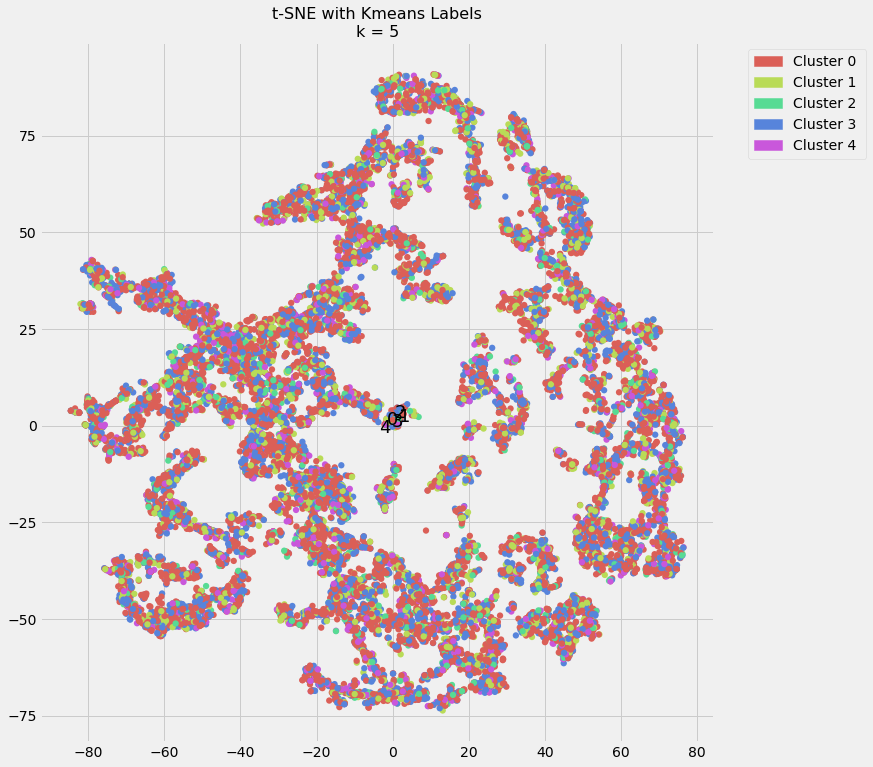


Saved t-SNE plot.


In [477]:
sample_label = pd.DataFrame(cluster_pred).sample(frac=0.05).to_numpy().flatten()
tsne_scatter(tsne_cos_coords, sample_label)

In [ ]:
# https://stackoverflow.com/questions/21287624/convert-pandas-column-containing-nans-to-dtype-int

### Using Gower's distance

In [336]:
# https://medium.com/analytics-vidhya/gowers-distance-899f9c4bd553
import gower

Xd=pd.DataFrame({'age':[21,21,19, 30,21,21,19,30,None],
'gender':['M','M','N','M','F','F','F','F',None],
'civil_status':['MARRIED','SINGLE','SINGLE','SINGLE','MARRIED','SINGLE','WIDOW','DIVORCED',None],
'salary':[3000.0,1200.0 ,32000.0,1800.0 ,2900.0 ,1100.0 ,10000.0,1500.0,None],
'has_children':[1,0,1,1,1,0,0,1,None],
'available_credit':[2200,100,22000,1100,2000,100,6000,2200,None]})
Yd = Xd.iloc[1:3,:]
X = np.asarray(Xd)
Y = np.asarray(Yd)

gower.gower_matrix(X)

array([[0.        , 0.3590238 , 0.6707398 , 0.31787416, 0.16872811,
        0.52622986, 0.59697855, 0.47778758,        nan],
       [0.3590238 , 0.        , 0.6964303 , 0.3138769 , 0.523629  ,
        0.16720603, 0.45600235, 0.6539635 ,        nan],
       [0.6707398 , 0.6964303 , 0.        , 0.6552807 , 0.6728013 ,
        0.6969697 , 0.740428  , 0.8151941 ,        nan],
       [0.31787416, 0.3138769 , 0.6552807 , 0.        , 0.4824794 ,
        0.48108295, 0.74818605, 0.34332284,        nan],
       [0.16872811, 0.523629  , 0.6728013 , 0.4824794 , 0.        ,
        0.35750175, 0.43237334, 0.3121036 ,        nan],
       [0.52622986, 0.16720603, 0.6969697 , 0.48108295, 0.35750175,
        0.        , 0.2898751 , 0.4878362 ,        nan],
       [0.59697855, 0.45600235, 0.740428  , 0.74818605, 0.43237334,
        0.2898751 , 0.        , 0.57476616,        nan],
       [0.47778758, 0.6539635 , 0.8151941 , 0.34332284, 0.3121036 ,
        0.4878362 , 0.57476616, 0.        ,        nan],


In [338]:
df_sample = df.sample(frac=0.01)
df_sample.shape

(9654, 10)

In [40]:
X_gower = gower.gower_matrix(df_sample) # 5%

In [ ]:
X_gower = gower.gower_matrix(df_sample) # 2%

In [339]:
X_gower = gower.gower_matrix(df_sample) # 1%

Finding best k...
Estimated number of clusters: 5


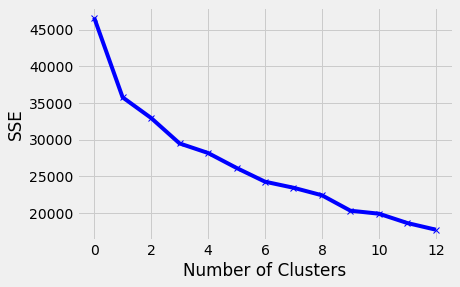

In [340]:
from sklearn_extra.cluster import KMedoids

print("Finding best k...")
iters =  15
sse = []
for i in range(2, iters):
    #kmean= KMeans(i, init='k-means++', verbose=0)
    kmedoids= KMedoids(i , init='k-medoids++')
    kmedoids.fit(X_gower)
    sse.append(kmedoids.inertia_)   

plt.style.use("fivethirtyeight")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.plot(sse, 'bx-')

from kneed import KneeLocator

kl = KneeLocator(range(2, iters), sse, curve="convex", direction="decreasing")
n_clusters = kl.elbow

print(f"Estimated number of clusters: {n_clusters}")

In [ ]:
print("Performing PCA...")
pca = PCA(n_components=0.95, random_state=1)
X_pca = pca.fit_transform(X_gower)
#print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')

In [351]:
from sklearn_extra.cluster import KMedoids

# fit k-mean clustering
#kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
kmedoids = KMedoids(n_clusters=n_clusters, init='k-medoids++')

# predict our clusters for each description
cluster_pred = kmedoids.fit_predict(X_pca)

# display by groups
df_plot = pd.DataFrame(list(X_gower), list(cluster_pred))
df_plot = df_plot.reset_index()
df_plot.rename(columns = {'index': 'Cluster'}, inplace = True)
df_plot['Cluster'] = df_plot['Cluster'].astype(int)

print(df_plot.head())

print(df_plot.groupby('Cluster').agg({'Cluster': 'count'}))

   Cluster         0         1         2         3         4         5  \
0        0  0.000000  0.111224  0.254154  0.012344  0.366042  0.260685   
1        0  0.111224  0.000000  0.265363  0.123562  0.377252  0.251504   
2        1  0.254154  0.265363  0.000000  0.241810  0.212001  0.314191   
3        0  0.012344  0.123562  0.241810  0.000000  0.353698  0.273024   
4        3  0.366042  0.377252  0.212001  0.353698  0.000000  0.325857   

          6         7         8         9        10        11        12  \
0  0.187180  0.100062  0.171766  0.277007  0.261068  0.202223  0.260221   
1  0.198390  0.111282  0.182989  0.284242  0.272277  0.209564  0.251039   
2  0.266974  0.254091  0.282388  0.331130  0.306914  0.255928  0.314331   
3  0.174836  0.112283  0.159427  0.289348  0.248724  0.214563  0.272560   
4  0.278862  0.365980  0.294276  0.293019  0.205686  0.367697  0.326220   

         13        14        15        16        17        18        19  \
0  0.280737  0.274867  0.1691

### t-SNE

Computing t-SNE...
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 8512 samples in 0.094s...
[t-SNE] Computed neighbors for 8512 samples in 10.083s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8512
[t-SNE] Computed conditional probabilities for sample 2000 / 8512
[t-SNE] Computed conditional probabilities for sample 3000 / 8512
[t-SNE] Computed conditional probabilities for sample 4000 / 8512
[t-SNE] Computed conditional probabilities for sample 5000 / 8512
[t-SNE] Computed conditional probabilities for sample 6000 / 8512
[t-SNE] Computed conditional probabilities for sample 7000 / 8512
[t-SNE] Computed conditional probabilities for sample 8000 / 8512
[t-SNE] Computed conditional probabilities for sample 8512 / 8512
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.361702
[t-SNE] KL divergence after 1000 iterations: 0.242981
t-SNE Done.


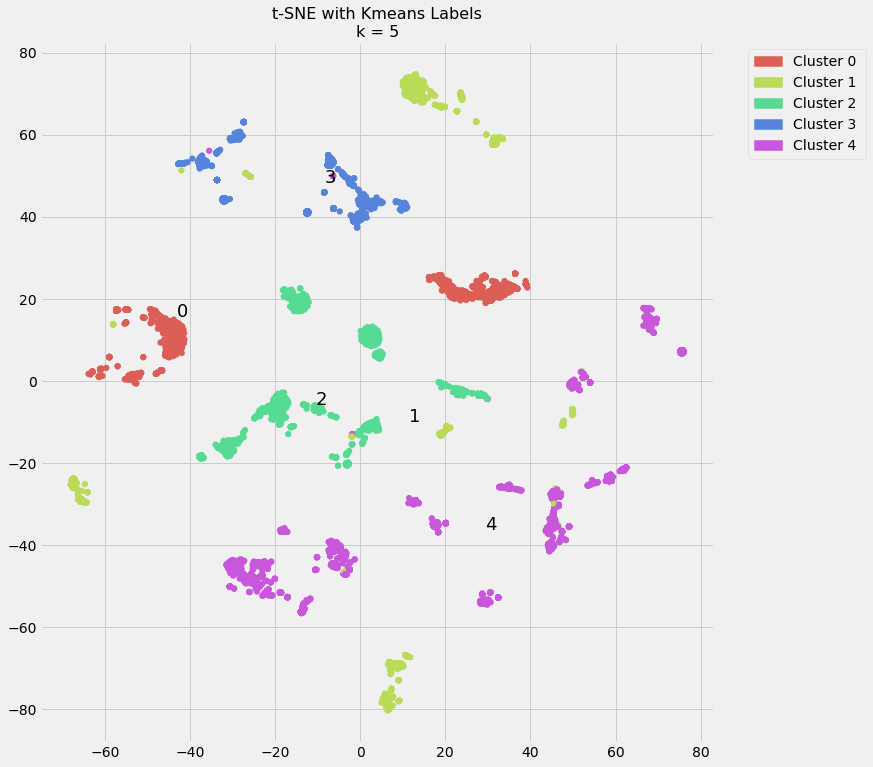


Saved t-SNE plot.


In [52]:
tsne_cos = TSNE(n_components=2,
                perplexity=100,  # 30
                learning_rate=1000,
                n_iter=1000,
                metric='cosine',
                verbose=1)

#X_sample = pd.DataFrame(X_norm).sample(frac=0.01).to_numpy()
dist = 1 - cosine_similarity(X_gower)

print("Computing t-SNE...")
tsne_cos_coords_gower = tsne_cos.fit_transform(dist)
print("t-SNE Done.")

def tsne_scatter(x, labels):
    n_labels = len(set(labels))
    palette = np.array(sns.color_palette("hls", n_labels))  # color palette with seaborn.
    f = plt.figure(figsize=(18, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:, 0], x[:, 1], linewidth=0, s=40, color=palette[labels])
    # ax.axis('off')
    ax.axis('tight')
    txts = []
    color_patches = []
    for i in range(n_labels):
        # Position of each label
        patch = mpatches.Patch(color=palette[i], label="Cluster %i " % i) 
        color_patches.append(patch)
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=18)
        txts.append(txt)
    plt.legend(handles=color_patches, bbox_to_anchor=(1.04, 1), loc="upper left", fontsize=14)
    plt.subplots_adjust(right=0.60)
    plt.title("t-SNE with Kmeans Labels" + "\n" + "k = %s" % n_clusters, fontsize=16)
    plt.savefig("tsne-cluster-sample.png")
    plt.show()
    print()
    print("Saved t-SNE plot.")

#sample_label = pd.DataFrame(cluster_pred).sample(frac=0.01).to_numpy().flatten()
tsne_scatter(tsne_cos_coords_gower, cluster_pred)

Computing t-SNE...
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 9654 samples in 0.073s...
[t-SNE] Computed neighbors for 9654 samples in 6.002s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9654
[t-SNE] Computed conditional probabilities for sample 2000 / 9654
[t-SNE] Computed conditional probabilities for sample 3000 / 9654
[t-SNE] Computed conditional probabilities for sample 4000 / 9654
[t-SNE] Computed conditional probabilities for sample 5000 / 9654
[t-SNE] Computed conditional probabilities for sample 6000 / 9654
[t-SNE] Computed conditional probabilities for sample 7000 / 9654
[t-SNE] Computed conditional probabilities for sample 8000 / 9654
[t-SNE] Computed conditional probabilities for sample 9000 / 9654
[t-SNE] Computed conditional probabilities for sample 9654 / 9654
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.296700
[t-SNE] KL divergence after 1000 iterations: 0.234868
t-SNE Done.


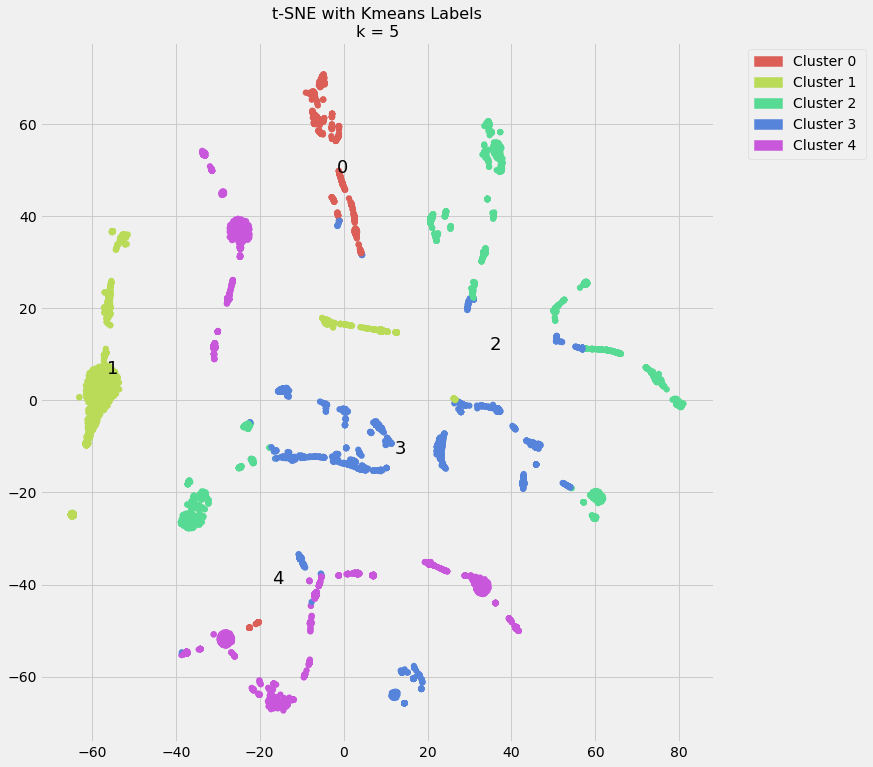


Saved t-SNE plot.


In [352]:
# AFTER PCA REDUCTION
tsne_cos = TSNE(n_components=2,
                perplexity=100,  # 30
                learning_rate=1000,
                n_iter=1000,
                metric='cosine',
                verbose=1)

#X_sample = pd.DataFrame(X_norm).sample(frac=0.01).to_numpy()
dist = 1 - cosine_similarity(X_gower)

print("Computing t-SNE...")
tsne_cos_coords_gower = tsne_cos.fit_transform(dist)
print("t-SNE Done.")

def tsne_scatter(x, labels):
    n_labels = len(set(labels))
    palette = np.array(sns.color_palette("hls", n_labels))  # color palette with seaborn.
    f = plt.figure(figsize=(18, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:, 0], x[:, 1], linewidth=0, s=40, color=palette[labels])
    # ax.axis('off')
    ax.axis('tight')
    txts = []
    color_patches = []
    for i in range(n_labels):
        # Position of each label
        patch = mpatches.Patch(color=palette[i], label="Cluster %i " % i) 
        color_patches.append(patch)
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=18)
        txts.append(txt)
    plt.legend(handles=color_patches, bbox_to_anchor=(1.04, 1), loc="upper left", fontsize=14)
    plt.subplots_adjust(right=0.60)
    plt.title("t-SNE with Kmeans Labels" + "\n" + "k = %s" % n_clusters, fontsize=16)
    plt.savefig("tsne-cluster-sample-pca.png")
    plt.show()
    print()
    print("Saved t-SNE plot.")

#sample_label = pd.DataFrame(cluster_pred).sample(frac=0.01).to_numpy().flatten()
tsne_scatter(tsne_cos_coords_gower, cluster_pred)

### Cluster classification

In [353]:
# function to print out classification model report
def classification_report(model_name, test, pred):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    
    print(model_name, ":\n")
    print("Accuracy Score: ", '{:,.3f}'.format(float(accuracy_score(test, pred)) * 100), "%")
    print("     Precision: ", '{:,.3f}'.format(float(precision_score(test, pred, average='macro')) * 100), "%")
    print("        Recall: ", '{:,.3f}'.format(float(recall_score(test, pred, average='macro')) * 100), "%")
    print("      F1 score: ", '{:,.3f}'.format(float(f1_score(test, pred, average='macro')) * 100), "%")

In [354]:

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test, y_train, y_test = train_test_split(X_pca, cluster_pred, test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

X_train size: 7723
X_test size: 1931 



In [355]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

# SGD instance
sgd_clf = SGDClassifier(max_iter=10000, tol=1e-3, random_state=42, n_jobs=-1)
# train SGD
sgd_clf.fit(X_train, y_train)

# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3, n_jobs=-1)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Training Set)", y_train, sgd_pred)

Stochastic Gradient Descent Report (Training Set) :

Accuracy Score:  99.120 %
     Precision:  99.191 %
        Recall:  99.013 %
      F1 score:  99.099 %


In [356]:
# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=3, n_jobs=-1)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Training Set)", y_test, sgd_pred)

Stochastic Gradient Descent Report (Training Set) :

Accuracy Score:  98.861 %
     Precision:  99.086 %
        Recall:  98.828 %
      F1 score:  98.949 %


In [357]:
sgd_pred = sgd_clf.predict(X_pca)

In [358]:
sgd_pred

array([0, 0, 1, ..., 4, 2, 3], dtype=int64)

In [359]:
df_sample['sgd_pred'] = sgd_pred

In [360]:
df_sample

anno  aduana   contribuyente  inciso_ara pais_origen  cif_item  \
128711  2018       1   5033010081010  85151900.0          US      3.20   
132260  2018       1  06140402701062  96032100.0          US     43.55   
154114  2018       1  06142711901010  33059000.0          GT   7924.35   
93642   2018       1   5033010081010  73181500.0          US     37.64   
889175  2018       5  06142008011037  22021300.0          GT   5178.10   
...      ...     ...             ...         ...         ...       ...   
834193  2018       4  06142810991047  40101200.0          US   3038.42   
8895    2018       1  14061006590018  62046200.0          CN   1092.96   
562858  2018       3  06140702850010  85392900.0          US     11.14   
638053  2018       3  06141702660013  34029020.0          CN    148.20   
860351  2018       5  06142008011037  39231090.0          GT   2052.61   

        cuantia  peso_bruto  impuesto_total  illicit  sgd_pred  
128711      3.0        0.43            0.97        0         0  
132260    166.0        1.00           27.51        0         0  
154114   3852.0     1074.71         2248.36        0         1  
93642      47.0        7.38           15.64        0         0  
889175  13440.0    22500.00         4170.86        0         3  
...         ...         ...             ...      ...       ...  
834193    295.3      661.39          900.98        0         4  
8895      504.0      794.62          719.39        0         2  
562858      1.0        0.12            4.80        0         4  
638053     21.0        5.00           95.08        0         2  
860351    880.0     1760.00          591.24        0         3  

[9654 rows x 11 columns]

In [362]:
df_sample.sgd_pred.value_counts()

4    2456
2    2295
3    2294
1    1692
0     917
Name: sgd_pred, dtype: int64

### Cluster Analysis

D:\Users\javia\anaconda3\envs\ai\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\Users\javia\anaconda3\envs\ai\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\Users\javia\anaconda3\envs\ai\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\Users\javi

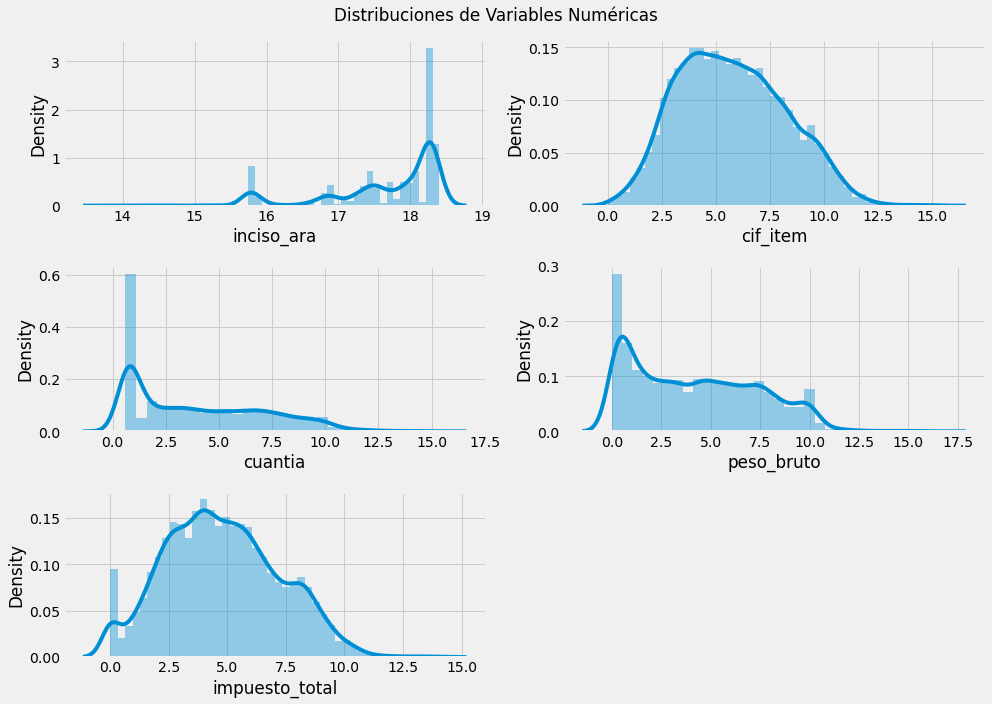

In [363]:
numeric_vars = [x for x in df_sample.columns if df_sample[x].dtype == 'float64']

# Set figure size
plt.figure(figsize=(14, 10))

for i, var in enumerate(numeric_vars):
    plt.subplot(3, 2, i+1)
    sns.distplot(df_sample[var].apply(np.log1p), kde=True) # https://numpy.org/doc/stable/reference/generated/numpy.log1p.html
    #sns.displot(data=df, x=var, kind='kde', log_scale=True)
    plt.suptitle("Distribuciones de Variables Numéricas")
    plt.tight_layout()

D:\Users\javia\anaconda3\envs\ai\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\Users\javia\anaconda3\envs\ai\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\Users\javia\anaconda3\envs\ai\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\Users\javi

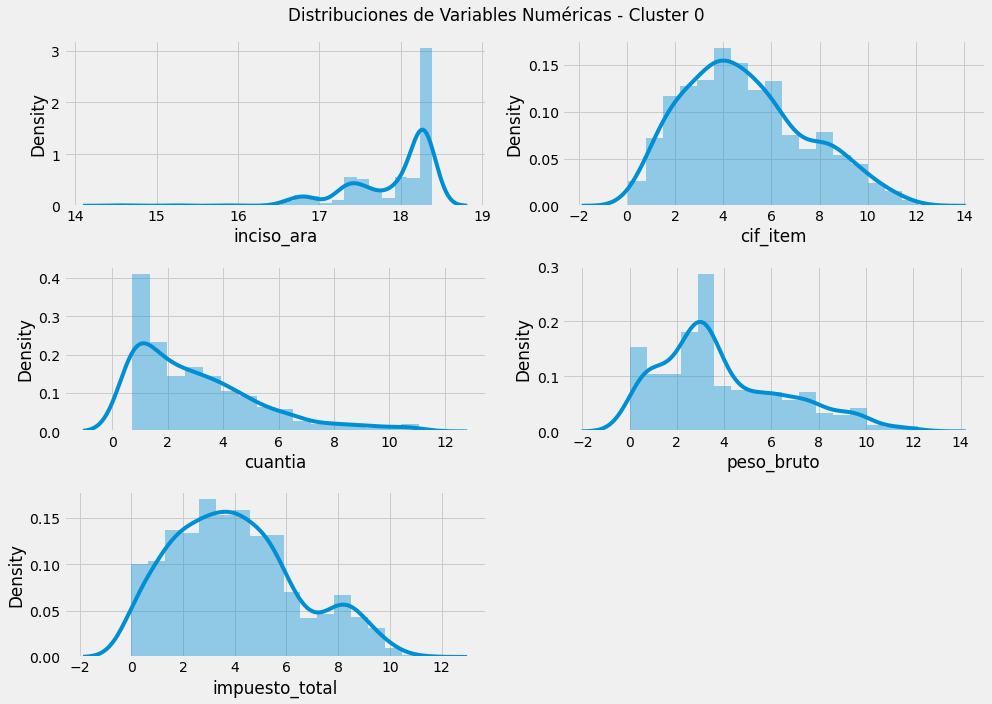

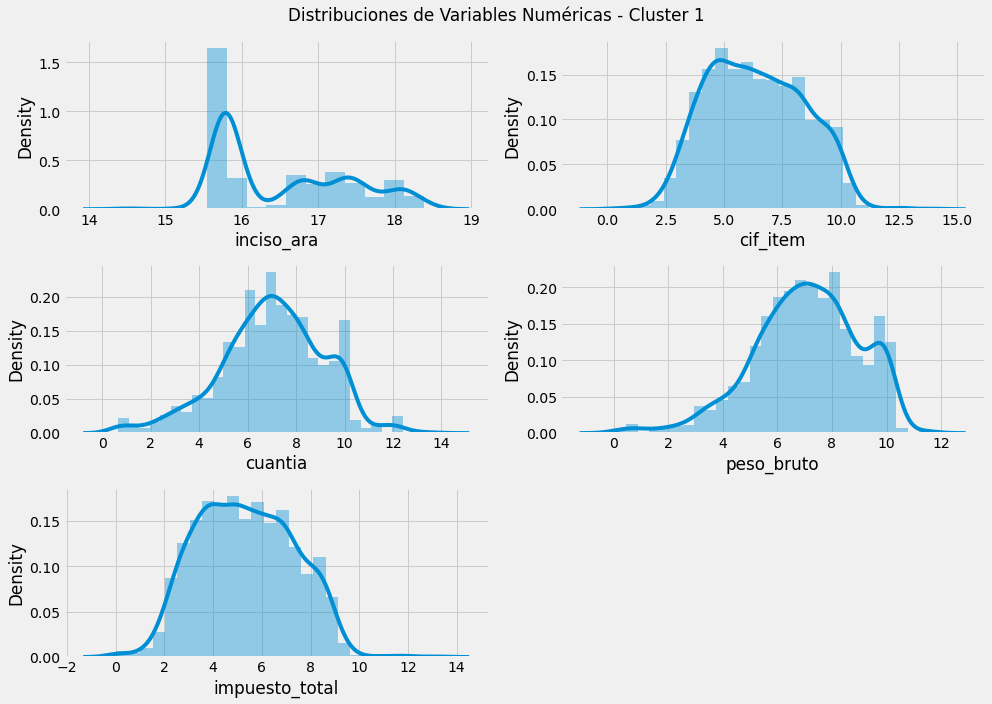

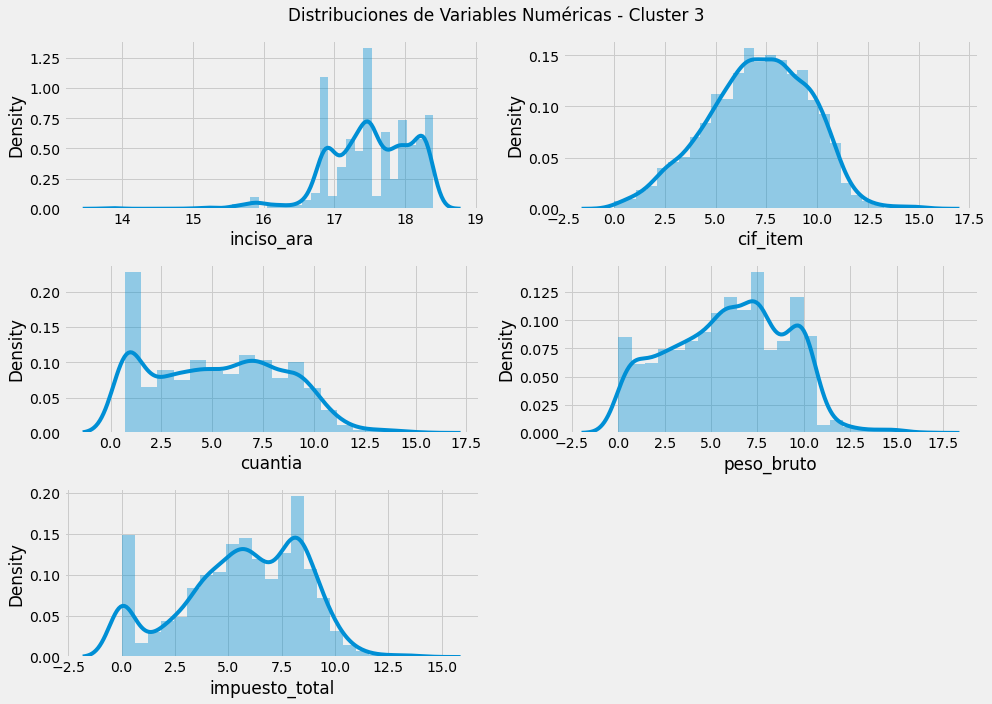

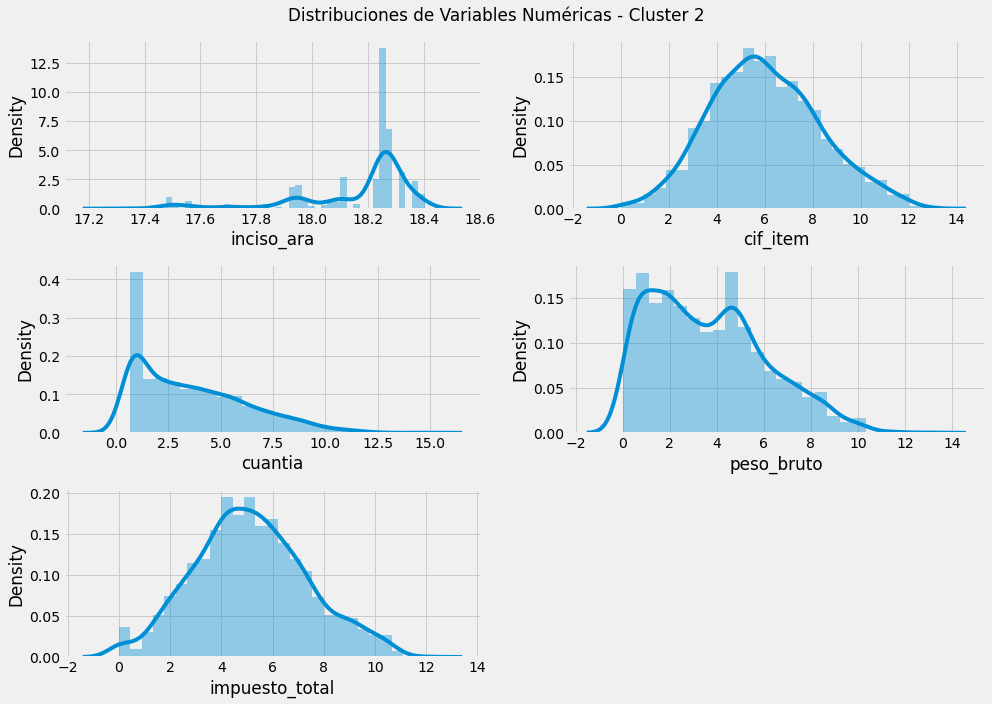

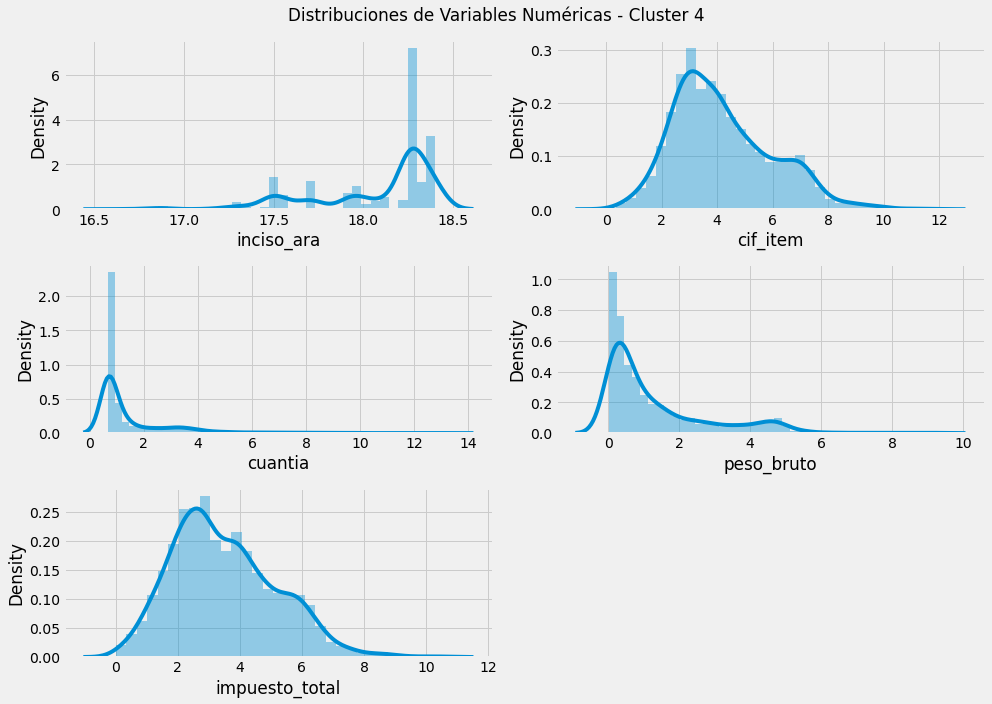

In [368]:
for x in df_sample.sgd_pred.unique():
    temp = df_sample[df_sample.sgd_pred == x]

    numeric_temp = [x for x in temp.columns if temp[x].dtype == 'float64']

    # Set figure size
    plt.figure(figsize=(14, 10))

    for i, var in enumerate(numeric_temp):
        plt.subplot(3, 2, i+1)
        sns.distplot(temp[var].apply(np.log1p), kde=True) # https://numpy.org/doc/stable/reference/generated/numpy.log1p.html
        #sns.displot(data=df, x=var, kind='kde', log_scale=True)
        plt.suptitle(f"Distribuciones de Variables Numéricas - Cluster {x}")
        plt.tight_layout()

In [370]:
for x in df_sample.sgd_pred.unique():
    temp = df_sample[df_sample.sgd_pred == x]
    print(f"Descriptive stats for cluster {x}")
    print(temp.describe())
    print()

Descriptive stats for cluster 0
         anno      aduana    inciso_ara       cif_item       cuantia  \
count   917.0  917.000000  9.170000e+02     917.000000    917.000000   
mean   2018.0    1.102508  6.628769e+07    2931.560349   1006.154755   
std       0.0    0.303481  2.572608e+07   11659.520334   5537.987709   
min    2018.0    1.000000  2.032900e+06       0.070000      1.000000   
25%    2018.0    1.000000  3.926910e+07      18.430000      2.000000   
50%    2018.0    1.000000  8.213000e+07      98.890000     12.000000   
75%    2018.0    1.000000  8.544493e+07     655.180000     70.000000   
max    2018.0    2.000000  9.701102e+07  184400.670000  63000.000000   

          peso_bruto  impuesto_total  illicit  sgd_pred  
count     917.000000      917.000000    917.0     917.0  
mean     2450.241341      998.715093      0.0       0.0  
std     12728.452557     3659.543752      0.0       0.0  
min         0.010000        0.000000      0.0       0.0  
25%         7.000000        7

### Tax Prediction XGB Regressor 

In [380]:
def plot_gain_lift(model):
    model_pred = model.predict(X_valid)
    model_proba = model.predict_proba(X_valid)

    temp = pd.DataFrame({
      'actual': y_valid, 
      'p(0)': [p[0] for p in model_proba],
      'p(1)': [p[1] for p in model_proba],
      'predicted': model_pred,
    })

    temp = temp.sort_values(by=['p(1)'], ascending=False)
    
    plt.style.use('fivethirtyeight')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    
    gainsChart(temp.actual, ax=axes[0])
    liftChart(temp.actual, title=False, ax=axes[1])
    
    plt.suptitle(str(model).split('(')[0])
    plt.show()
    

def plot_roc_auc(real, pred, model):
    # compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(real, pred)
    roc_auc = auc(fpr, tpr)
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=[8, 6])
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title(str(model).split('(')[0])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc="lower right")
    plt.show()

In [418]:
test = df[numeric_vars].drop(['inciso_ara'], axis=1)

In [421]:
test = df
test.loc[:, 'inciso_ara'] = test.loc[:, 'inciso_ara'].astype(str)
test.loc[:, 'aduana'] = test.loc[:, 'aduana'].astype(str)

for x in test.columns: 
    if test[x].dtype == 'object':
        test[x] = test[x].astype('category').cat.codes

In [422]:
predictors = [x for x in test.columns if x != 'impuesto_total']
categorical = [x for x in test.columns if test[x].dtype == 'object']

X = test[predictors]
y = test['impuesto_total']

In [423]:
X.dtypes

aduana              int8
contribuyente      int16
inciso_ara         int16
pais_origen        int16
cif_item         float64
cuantia          float64
peso_bruto       float64
illicit            int64
dtype: object

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(772280, 8)
(193071, 8)


In [425]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.metrics import classification_report, roc_curve, auc
from dmba import classificationSummary, liftChart, gainsChart

In [426]:
hgbr = HistGradientBoostingRegressor(verbose=1)
hgbr.fit(X_train, y_train)

hgbr_pred = hgbr.predict(X_test)
#hgbr_pred_proba = hgbr.predict_proba(X_test)


Binning 0.044 GB of training data: 0.180 s
Binning 0.005 GB of validation data: 0.006 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 9, train loss: 322606963.54001, val loss: 169334544.93840, in 0.430s
[2/100] 1 tree, 31 leaves, max depth = 9, train loss: 285741258.40798, val loss: 144532241.96934, in 0.100s
[3/100] 1 tree, 31 leaves, max depth = 10, train loss: 255906540.06680, val loss: 125262473.04095, in 0.094s
[4/100] 1 tree, 31 leaves, max depth = 9, train loss: 231368841.89483, val loss: 109464753.42902, in 0.095s
[5/100] 1 tree, 31 leaves, max depth = 10, train loss: 211191529.40609, val loss: 97133567.35509, in 0.098s
[6/100] 1 tree, 31 leaves, max depth = 10, train loss: 195042819.64741, val loss: 88485638.48660, in 0.121s
[7/100] 1 tree, 31 leaves, max depth = 10, train loss: 181332869.71369, val loss: 81083946.52753, in 0.090s
[8/100] 1 tree, 31 leaves, max depth = 11, train loss: 170385551.64645, val loss: 75416506.59731, in 0.086s
[9/100] 1 tree

In [427]:
print(f"Train regression score: {hgbr.score(X_train, y_train).round(3)}")
print()
print(f"Test regression score: {hgbr.score(X_test, y_test).round(3)}")

Train regression score: 0.687

Test regression score: 0.69


0.5373675984355231